<a href="https://colab.research.google.com/github/fangnes/pucrio_data_science_and_analytics/blob/main/MVP_Machine_Learning_%26_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align:center">Pontifícia Universidade Católica do Rio de Janeiro</h1>



<h1 style="text-align:center">Machine Learning & Analytics MPV</h1>

<h3 style="text-align:center">Author: Felipe da Silva Angnes</h3>

<h3 style="text-align:center">Professors: Tatiana Escovedo, Hugo Villamizar, Augusto Baffa, Luiz Schirmer, Patrick Happ</h3>

# 1. Introduction

The present document aims to describe the process executed during the minimum viable product (MVP) development as the final work for the Machine Learning & Analytics discipline, which is the first module of my Data Science and Analytics specialization at Pontifícia Universidade Católica do Rio de Janeiro (PUC-RJ).

This work presents the development of a machine learning model for a classification problem and is structured as follows: in section 2 we present the problem definition, dataset structure and assumptions; in section 3 we prepare this notebook and the dataset for model development; section 4 comprises the modeling and training process; and in section 5 we present the results analysis and the model selected to solve the problem.

The overall execution time of this notebook is estimated in about 15 to 17 minutes.

# 2. Problem Definition

The dataset selected for this work is available in the University of California, Irvine (UC Irvine) Machine Learning Repository through this [link](https://archive.ics.uci.edu/dataset/45/heart+disease). The dataset is licensed under a [Creative Commons Attribution 4.0 Internacional](https://creativecommons.org/licenses/by/4.0/legalcode) (CC BY 4.0) license and it was created by Andras Janosi, William Steinbrunn, Matthias Pfisterer and Robert Detrano.

The dataset contains several informations regarding the health of patients who have heart disease or are likely to have it. The goal of this dataset is to determine if the patient have a heart disease or not. Therefore, we are working on a classification problem. Originally, the dataset is made of 76 attributes, but the creators states in the dataset information that all published experiments refer to using a subset of 14 of them, including the target. So when we load the dataset it already comes with just the 14 referred attributes. Also, the target value is an integer valued from 0 (no presence) to 4, where values 1, 2, 3 and 4 indicates presence of heart disease, but the dataset's authors states that experiments with this dataset are mainly focused on simply attempting to distinguish presence from absence.

The structure of the dataset is, as stated before, 14 columns and 303 instances. The table below presents the 14 attributes and its description:

##Table 1: dataset structure <a id="table-1"></a>
|Attribute|Role   |Type       |Units|Missing Values|Description                                        |Values|
|---------|-------|-----------|-----|--------------|---------------------------------------------------|------|
|age      |Feature|Integer    |years|no            |Patient's age                                      ||
|sex      |Feature|Categorical|     |no            |Patient's sex                                      |0 = female <br> 1 = male|
|cp       |Feature|Categorical|     |no            |Chest pain type                                        |1 = typical angina <br> 2 = atypical angina <br> 3 = non-anginal pain <br> 4 = asymptomatic|
|trestbps |Feature|Integer    |mmHg |no            |Resting blood pressure on admission to the hospital||
|chol     |Feature|Integer    |mg/dl|no            |Serum cholestoral                                  ||
|fbs      |Feature|Categorical|     |no            |Fasting blood sugar > 120 mg/dl                    |0 = false <br> 1 = true|
|restecg  |Feature|Categorical|     |no            |Resting electrocardiographic results               |0 = normal <br> 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <br> 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria|
|thalach  |Feature|Integer    |     |no            |Maximum heart rate achieved                        ||
|exang    |Feature|Categorical|     |no            |Exercise induced angina                            |0 = no <br> 1 = yes|
|oldpeak  |Feature|Integer    |     |no            |ST depression induced by exercise relative to rest ||
|slope    |Feature|Categorical|     |no            |The slope of the peak exercise ST segment          |1 = upsloping <br> 2 = flat <br> 3 = downsloping|
|ca       |Feature|Integer    |     |yes           |Number of major vessels colored by flourosopy      |0 to 3|
|thal     |Feature|Categorical|     |yes           |                                                   |3 = normal <br> 6 = fixed defect <br> 7 = reversable defect|
|num      |Target |Integer    |     |no            |Diagnosis of heart disease                         |0 = don't have heart disease <br> 1 = have heart disease|


The integer attributes are continuous measures from the patients, so its values varies according to each particular case.

#3. Dataset Preparation

In this section we present the notebook setup and the dataset preparation.

##3.1. Notebook Configuration

###3.1.1 Installing Packages

To install the packages needed for this work, we will use the Preferred Installer Program (aka PIP Installs Package), which is a command-line utility that installs, reinstalls or uninstalls PyPI (Python Package Index) packages through the command `pip`.

We will use the `pandas` package to manipulate the dataset according to our needs, so here we ensure that it is available in this notebook.

In [281]:
!pip install pandas

In order to load the dataset from the UC Irvine Machine Learning Repository, it is required to install the `ucimlrepo` package.

In [282]:
!pip install ucimlrepo

###3.1.2 Importing Packages and Libraries

Here we import all necessary libraries and packages. The corresponding utitlity for this work is in the comments at the same line.

In [283]:
import datetime
init_timestamp = datetime.datetime.now()

# Utils packages
import warnings                                         # To ignore warnings
import pandas as pd                                     # To load and manipulate the dataset
import numpy as np                                      # For numeric operations, arrays and matrix processing
from ucimlrepo import fetch_ucirepo                     # To load the dataset from UCI Irvine

# Plot
import matplotlib.pyplot as plt                         # To plot results and analysis

# Model selection
from sklearn.model_selection import train_test_split    # To split the dataset into train and test subset
from sklearn.model_selection import StratifiedKFold     # To perform the stratified holdout
from sklearn.model_selection import cross_val_score     # To perform the cross validation
from sklearn.model_selection import GridSearchCV        # To perform feature selection through exhaustive search

# Pipelines
from sklearn.pipeline import Pipeline                   # To build a composite estimator

# Preprocessing
from sklearn.preprocessing import StandardScaler        # For data standardization
from sklearn.preprocessing import MinMaxScaler          # For data normalization

# Models
from sklearn.linear_model import LogisticRegression     # Logistic regression algorithm
from sklearn.neighbors import KNeighborsClassifier      # KNN algorithm
from sklearn.tree import DecisionTreeClassifier         # Decision tree algorithm
from sklearn.naive_bayes import GaussianNB              # Naive Bayes algorithm
from sklearn.svm import SVC                             # Support machine vectors algorithm

# Ensambles
## Bagging
from sklearn.ensemble import BaggingClassifier          # Bagging classifier ensamble algorithm
from sklearn.ensemble import RandomForestClassifier     # Random forest classifier ensamble algorithm
from sklearn.ensemble import ExtraTreesClassifier       # Extra trees classifier ensamble algorithm

## Voting
from sklearn.ensemble import VotingClassifier           # Voting classifier ensamble algorithm

## Boosting
from sklearn.ensemble import AdaBoostClassifier         # Adaboost classifier ensamble algorithm
from sklearn.ensemble import GradientBoostingClassifier # Gradient boost classifier ensable algorithm

# Feature seletcion
from sklearn.feature_selection import SelectKBest       # For univariate selection
from sklearn.feature_selection import f_classif         # For univariate selection ANOVA test
from sklearn.feature_selection import RFE               # For recursive feature elimination

# Metrics
from sklearn.metrics import recall_score                # To evaluate the models

###3.1.3 Global Variables

Here we define values that will be used across the notebook into variables.

As we are working on a heart disease problem, our goal is to minimize the false negatives results of our model. Therefore, the chosen evaluation metric for this work is the **recall**, which will help us to achieve this objective.

In [284]:
seed = 21           # Random seed to ensure reproducibility
scoring = 'recall'  # The chosen evaluation metric
target_index = 13   # Target index in the dataframe
num_features = 13   # Number of features in the dataset*
num_trees = 100     # Number of trees to be set in ensambles
test_size = 0.2     # We will leave 20% of the dataset for testing
max_features = 8    # Number of features for trees algorithms when looking for the best split
max_iter = 200      # Maximum number of itreations to be used in logistic regression classifier

\*Since we will, later in this notebook, extract a `numpy.ndarray` with all values of our dataframe, we need to access a slice of elements that corresponds to our features, and access the target value stand alone. The `numpy.ndarray` syntax for indexing and slicing is `array[start:stop:step]` where the `start` is the starting index (inclusive), the `stop` is the ending index (**exclusive**) and the `step` is the step or stride between elements. Therefore, in order to get the 13 features (index 0 to 12) we need to set our `stop` index to 13. But, if we access just one index, for example to access the target column, we can set the exact index that we need. This is why the variables `num_features` and `target_index` have the same value.

###3.1.4 Notebook Settings

Here we disable the warnings messages and set the `numpy` seed.

In [285]:
warnings.filterwarnings('ignore')

In [286]:
np.random.seed(seed)

###3.1.5 Utils

In this section we define some functions to avoid code duplicity and improve readability.

####3.1.5.1 Plot Evaluation Metric Infos

In [287]:
def eval_metric_mean_std_plot(model_results, model_names):
  """
  This function aims to help our analysis over the entire development.

  It receives a list of float lists values which is the cross validation
  models results, and a list of strings which is the models names. First of
  all, the function will get the mean and standard deviation from the results,
  then we will sort the results according to the mean in ascending order.
  Then the function will plot the results.

  The plot layout is defined as follows:
  - The means is represented as a blue bar chart, it scale is in the left side
    of the chart and ranges from 0 to 1 in a 0.1 step.
  - The standard deviation is represented as a red line chart, it scale is in
  the right side of the chart and ranges from 0 to 0.1 in a 0.01 step.

  :param model_results: a list that contains the results of cross validation
  results.
  :type model_results: list

  :param model_names: a list that contains the models name.
  :type model_names: list

  """


  # Get results means and standard deviation
  means = [arr.mean() for arr in model_results]
  std = [arr.std() for arr in model_results]

  # Group models mean and standard deviation with names and sort by mean
  models_info = list(zip(model_names, means, std))
  models_info_sorted = sorted(models_info, key=lambda x: x[1])

  # Get isolated lists for names, means and standard deviation
  names_sorted = [t[0] for t in models_info_sorted]
  means_sorted = [t[1] for t in models_info_sorted]
  std_sorted = [t[2] for t in models_info_sorted]

  # For verbose execution, uncomment the next 2 code lines below
  # for i in range(len(names_sorted)):
  #   print("%s: %.3f (%.3f)" % (names_sorted[i], means_sorted[i], std_sorted[i]))

  # Configuring plot size
  fig, ax1 = plt.subplots(figsize=(len(models_info)/1.5,6))

  # Configuring bar chart
  color = 'tab:blue'
  ax1.set_xlabel('Models')
  ax1.set_ylabel('Evaluation Metric Mean', color=color)
  bars = ax1.bar(names_sorted, means_sorted, color=color, label='Mean')
  ax1.tick_params(axis='y', labelcolor=color)
  ax1.set_ylim(0,1)
  ax1.set_yticks([i/10 for i in range(11)])
  plt.xticks(rotation=90)

  # Configuring line chart
  ax2 = ax1.twinx()
  color = 'tab:red'
  ax2.set_ylabel('Standar Variation', color=color)
  ax2.plot(std_sorted, marker='o', linestyle='-', color=color, label='Std var')
  ax2.tick_params(axis='y', labelcolor=color)
  ax2.set_ylim(0, 0.1)
  ax2.set_yticks([i/100 for i in range(21)])
  fig.tight_layout()

  # Legend and grid configuration
  plt.gca().set_axisbelow(True)
  ax1.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=0)
  ax1.legend(loc='upper left')
  ax2.legend(loc='upper right')

  plt.show()

####3.1.5.2 Cross Validation Score Execution

In [288]:
def cross_val_score_execution(models, X_train, y_train, kfold, scoring):
  """
  This function execute the cross validation process.

  It will execute the cross validation process for each algorithm received
  and return its results

  :param models: the model's names and alrogithms
  :type models: list of tuples with model names (string) and model algorithm objetc

  :param X_train: subset for training
  :type X_train: numpy.ndarray

  :param y_train: training data rotules
  :type y_train: numpy.ndarray

  :param kfold: handler to execute the holdout process
  :type kfold: StratifiedKFold object

  :param scoring: the chosen evaluation metric
  :type scoring: string

  :return names: the names of the models
  :rtype names: list of strings

  :return results: the names of the models
  :rtype results: list of strings

  """

  # Lists that will be returned
  results = []
  names = []

  # Iterates over the list of tuples to execute the cross validation
  for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)

  return names, results

####3.1.5.2 Cross Validation Score Execution with Selected Features

In [289]:
def cross_validation_with_selected_features(models, df, y, features_selected, num_folds, scoring):
  """
  This function execute the cross validation process just with the selected attributes.

  It will extract a subset of our training dataset with just the desired attributes,
  which is the result of the feature selection process. This function considers
  the best 4, 7 and 10 best features from the list of features received.

  :param models: the model's names and alrogithms
  :type models: list of tuples with model names (string) and model algorithm objetc

  :param df: training dataset to extract the subset
  :type df: pandas.dataframe

  :param y: training data rotules
  :type y: numpy.ndarray

  :param features_selected: list which contains the features names to be considered
  during the cross validation process
  :type features_selected: list of strings

  :param scoring: the chosen evaluation metric
  :type scoring: string

  :return names: the models names
  :rtype names: list of strings

  :return results: the models results
  :rtype results: list of strings

  """

  X_4_train  = df[features_selected[:3]].values
  X_7_train  = df[features_selected[:6]].values
  X_10_train = df[features_selected[:9]].values

  names_4, results_4   = cross_val_score_execution(models, X_4_train,  y, num_folds, scoring)
  names_7, results_7   = cross_val_score_execution(models, X_7_train,  y, num_folds, scoring)
  names_10, results_10 = cross_val_score_execution(models, X_10_train, y, num_folds, scoring)

  return names_4, results_4, names_7, results_7, names_10, results_10

####3.1.5.3 Get Features Names Sorted from Feature Importances

In [290]:
def get_features_name_sorted_from_feature_importances(df, model):
  """
  This function returns the features names got from features importances
  sorted by its importance.

  It creates a dictionary with the features names and its corresponding
  importance score. Then the disctionary is sorted by importance score in
  descending order and returns the features names sorted in this whay.

  :param df: training dataset to extract the columns names
  :type df: pandas.dataframe

  :param model: the model to get the feature importances
  :type model: classifier object

  :return names_sorted: the features names
  :rtype names_sorted: list of strings
  """

  names_features = list(zip(df.columns[:13], model.feature_importances_))
  names_features_sorted = sorted(names_features, key=lambda x: x[1], reverse=True)

  names_sorted = [x[0] for x in names_features_sorted]

  return names_sorted

##3.2 Dataset Load

In this section we load the dataset and get its features and target values as dataframes. Also, we perform a visual analysis of the datafrases.

In [291]:
# Loading dataset
heart_disease = fetch_ucirepo(name='Heart Disease')

In [292]:
# Getting dataset features and target dataframes
X = heart_disease.data.features
y = heart_disease.data.targets

In [293]:
# Feature dataframe visual analysis
X

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
0        3  0.0   6.0  
1        2  3.0   3.0  
2        2  2.0   7.0  
3        3  0.0   3.0  
4        1  0.0   3.0  
..     ...  ...   ...  
298      2  0.0   7.0  
299      2  2.0   7.0  
300      2  1.0   7.0  
301      2  1.0   3.0  
302      1  NaN   3.0  

[303 rows x 13 columns]

From [Table 1](#table-1), it is known that we have at least two columns (`ca` and `thal`) with missing values. By taking a look into the feature dataframe, it was possible to note an example of a row with a NaN (Not a Number) value in the `ca` column. This could lead our model to raise some error or have some undesired behavior, so we must handle this issue later.

In [294]:
# Target dataframe visual analysis
y

num
0      0
1      2
2      1
3      0
4      0
..   ...
298    1
299    2
300    3
301    1
302    0

[303 rows x 1 columns]

In [295]:
# Balance analysis
y.value_counts()

num
0      164
1       55
2       36
3       35
4       13
Name: count, dtype: int64

As described by the dataset authors, the target value ranges from 0 to 4 but experiments using this dataset remains on identify the presence or absence of heart disease. Also, we noticed that our target classes is severely unbalanced, this issue will handle in the next section aswell.

##3.3 Dataset Cleaning

First, lets set all the target dataframe values different than 0 to 1.

In [296]:
# All values bigger and 0 are set to 1
y['num'] = y['num'].apply(lambda x: 1 if x > 0 else x)

y

num
0      0
1      1
2      1
3      0
4      0
..   ...
298    1
299    1
300    1
301    1
302    0

[303 rows x 1 columns]

In [297]:
# Balance analysis
y.value_counts()

num
0      164
1      139
Name: count, dtype: int64

Now we can observe that our dataset is slightly unbalanced in a 1:1.17 ratio.

Now we must handle the NaN values in our feature dataframe. We will use the count() function to identify which columns have NaN values:

In [298]:
X.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          299
thal        301
dtype: int64

By using the X.count() we can observe that two columns have some NaN values in the features dataframe (4 rows in `ca` column and 2 rows in `thal` column). As none of the columns has presented a expressive amount of NaN values, we will handle this issue through data removal, by removing the rows that caontains NaN values from the dataframe. However, if we drop the NaN rows directly from X dataframe, we would not be able to drop the related target class in the dataframe y, so, we will concatenate these dataframes and then drop the rows that contains NaN values.

In [299]:
# Concatenating feature and target datasets. "axis=1" means that we'll concatenate the columns.
df_heart_disease = pd.concat([X,y], axis=1)

# Checking the result
df_heart_disease

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  num  
0        3  0.0   6.0    0  
1        2  3.0   3.0    1  
2        2  2.0   7.0    1  
3        3  0.0   3.0    0  
4        1  0.0   3.0    0  
..     ...  ...   ...  ...  
298      2  0.0   7.0    1  
299      2  2.0   7.0    1  
300      2  1.0   7.0    1  
301      2  1.0   3.0    1  
302      1  NaN   3.0    0  

[303 rows x 14 columns]

In [300]:
# Dropping NaN rows
df_heart_disease = df_heart_disease.dropna()

# Checking the result
df_heart_disease.count()

age         297
sex         297
cp          297
trestbps    297
chol        297
fbs         297
restecg     297
thalach     297
exang       297
oldpeak     297
slope       297
ca          297
thal        297
num         297
dtype: int64

Unfortunately, as we can see in the result above, the `ca` and `thal` rows with NaN didn't coincide, leaving us with the worst case scenario of 297 samples. Since we still have 98% of the original dataset, our model will not be penalyzed by this.

##3.4 Holdout and Folds Configuration

In this section we will perform the holdout over our dataset and configure how the folds will be defined. But first of all we need to get our features values as a `numpy.ndarray` and our target values as a `numpy.ndarray` aswell.

In [301]:
# Getting dataframe values as numpy.ndarray
arr_heart_disease = df_heart_disease.values

# Getting just the features values
X = arr_heart_disease[:,0:num_features]

X

array([[63.,  1.,  1., ...,  3.,  0.,  6.],
       [67.,  1.,  4., ...,  2.,  3.,  3.],
       [67.,  1.,  4., ...,  2.,  2.,  7.],
       ...,
       [68.,  1.,  4., ...,  2.,  2.,  7.],
       [57.,  1.,  4., ...,  2.,  1.,  7.],
       [57.,  0.,  2., ...,  2.,  1.,  3.]])

In [302]:
# Getting just the target values
y = arr_heart_disease[:,target_index]

y

array([0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1.

After getting the values as arrays, we will split our dataset into train and test dataset. The approach to split the dataset is to train the models with 80% of the dataset and keep 20% for training. We will perform a stratify split of our dataset in order to keep the classes ratio, that we have in the original dataset, in the train and test datasets. To do so, we must set `suffle=True` to change the rows order and keep the class ratio, and `stratify=y` so the `train_test_split` function can apply the same reordering to the target subset and keep the original features labels. We are also setting the `random_state=seed` in order to ensure reproducibility.

In [303]:
# Splitting our dataset in train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=seed, stratify=y)
X_train

array([[54.,  1.,  2., ...,  1.,  0.,  7.],
       [53.,  1.,  3., ...,  3.,  0.,  3.],
       [39.,  1.,  4., ...,  2.,  0.,  7.],
       ...,
       [49.,  0.,  2., ...,  2.,  0.,  3.],
       [58.,  0.,  4., ...,  2.,  0.,  3.],
       [53.,  0.,  4., ...,  2.,  0.,  3.]])

Now that we have our train and test subsets as arrays, we will create a dataframe from both features subset. It will be useful during the feature selection to access just the desired attributes.

In [304]:
# Getting feature column names, -1 to exclude the last column
# which is our target column
columns_names = df_heart_disease.columns[:-1].tolist()

# Creating dataframe from X_train data
df_X_train = pd.DataFrame(X_train, columns=columns_names)
df_X_train

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    54.0  1.0  2.0     108.0  309.0  0.0      0.0    156.0    0.0      0.0   
1    53.0  1.0  3.0     130.0  197.0  1.0      2.0    152.0    0.0      1.2   
2    39.0  1.0  4.0     118.0  219.0  0.0      0.0    140.0    0.0      1.2   
3    60.0  1.0  4.0     130.0  253.0  0.0      0.0    144.0    1.0      1.4   
4    54.0  0.0  2.0     132.0  288.0  1.0      2.0    159.0    1.0      0.0   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
232  65.0  1.0  4.0     135.0  254.0  0.0      2.0    127.0    0.0      2.8   
233  46.0  0.0  2.0     105.0  204.0  0.0      0.0    172.0    0.0      0.0   
234  49.0  0.0  2.0     134.0  271.0  0.0      0.0    162.0    0.0      0.0   
235  58.0  0.0  4.0     100.0  248.0  0.0      2.0    122.0    0.0      1.0   
236  53.0  0.0  4.0     130.0  264.0  0.0      2.0    143.0    0.0      0.4   

     slope   ca  thal  
0      1.0  0.0   7.0  
1      3.0  0.0   3.0  
2      2.0  0.0   7.0  
3      1.0  1.0   7.0  
4      1.0  1.0   3.0  
..     ...  ...   ...  
232    2.0  1.0   7.0  
233    1.0  0.0   3.0  
234    2.0  0.0   3.0  
235    2.0  0.0   3.0  
236    2.0  0.0   3.0  

[237 rows x 13 columns]

In [305]:
# Creating dataframe from X_test data
df_X_test = pd.DataFrame(X_test, columns=columns_names)
df_X_test

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   57.0  1.0  3.0     128.0  229.0  0.0      2.0    150.0    0.0      0.4   
1   59.0  1.0  1.0     134.0  204.0  0.0      0.0    162.0    0.0      0.8   
2   56.0  1.0  4.0     132.0  184.0  0.0      2.0    105.0    1.0      2.1   
3   64.0  0.0  3.0     140.0  313.0  0.0      0.0    133.0    0.0      0.2   
4   55.0  1.0  2.0     130.0  262.0  0.0      0.0    155.0    0.0      0.0   
5   53.0  1.0  4.0     123.0  282.0  0.0      0.0     95.0    1.0      2.0   
6   46.0  0.0  3.0     142.0  177.0  0.0      2.0    160.0    1.0      1.4   
7   66.0  1.0  2.0     160.0  246.0  0.0      0.0    120.0    1.0      0.0   
8   45.0  1.0  2.0     128.0  308.0  0.0      2.0    170.0    0.0      0.0   
9   50.0  1.0  3.0     140.0  233.0  0.0      0.0    163.0    0.0      0.6   
10  62.0  0.0  4.0     138.0  294.0  1.0      0.0    106.0    0.0      1.9   
11  59.0  1.0  4.0     138.0  271.0  0.0      2.0    182.0    0.0      0.0   
12  57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0      0.6   
13  56.0  1.0  4.0     125.0  249.0  1.0      2.0    144.0    1.0      1.2   
14  43.0  1.0  4.0     150.0  247.0  0.0      0.0    171.0    0.0      1.5   
15  60.0  0.0  4.0     150.0  258.0  0.0      2.0    157.0    0.0      2.6   
16  54.0  1.0  4.0     124.0  266.0  0.0      2.0    109.0    1.0      2.2   
17  41.0  0.0  3.0     112.0  268.0  0.0      2.0    172.0    1.0      0.0   
18  44.0  1.0  4.0     120.0  169.0  0.0      0.0    144.0    1.0      2.8   
19  45.0  1.0  4.0     142.0  309.0  0.0      2.0    147.0    1.0      0.0   
20  66.0  1.0  4.0     112.0  212.0  0.0      2.0    132.0    1.0      0.1   
21  70.0  1.0  3.0     160.0  269.0  0.0      0.0    112.0    1.0      2.9   
22  63.0  0.0  3.0     135.0  252.0  0.0      2.0    172.0    0.0      0.0   
23  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
24  49.0  1.0  2.0     130.0  266.0  0.0      0.0    171.0    0.0      0.6   
25  65.0  0.0  3.0     140.0  417.0  1.0      2.0    157.0    0.0      0.8   
26  61.0  1.0  4.0     138.0  166.0  0.0      2.0    125.0    1.0      3.6   
27  49.0  1.0  3.0     120.0  188.0  0.0      0.0    139.0    0.0      2.0   
28  56.0  1.0  2.0     130.0  221.0  0.0      2.0    163.0    0.0      0.0   
29  52.0  1.0  1.0     118.0  186.0  0.0      2.0    190.0    0.0      0.0   
30  63.0  0.0  2.0     140.0  195.0  0.0      0.0    179.0    0.0      0.0   
31  53.0  0.0  4.0     138.0  234.0  0.0      2.0    160.0    0.0      0.0   
32  67.0  0.0  3.0     115.0  564.0  0.0      2.0    160.0    0.0      1.6   
33  57.0  1.0  4.0     132.0  207.0  0.0      0.0    168.0    1.0      0.0   
34  48.0  1.0  4.0     124.0  274.0  0.0      2.0    166.0    0.0      0.5   
35  58.0  1.0  2.0     120.0  284.0  0.0      2.0    160.0    0.0      1.8   
36  49.0  0.0  4.0     130.0  269.0  0.0      0.0    163.0    0.0      0.0   
37  69.0  1.0  3.0     140.0  254.0  0.0      2.0    146.0    0.0      2.0   
38  56.0  1.0  2.0     120.0  240.0  0.0      0.0    169.0    0.0      0.0   
39  42.0  1.0  1.0     148.0  244.0  0.0      2.0    178.0    0.0      0.8   
40  54.0  1.0  3.0     120.0  258.0  0.0      2.0    147.0    0.0      0.4   
41  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
42  54.0  0.0  3.0     160.0  201.0  0.0      0.0    163.0    0.0      0.0   
43  57.0  1.0  4.0     152.0  274.0  0.0      0.0     88.0    1.0      1.2   
44  66.0  1.0  4.0     120.0  302.0  0.0      2.0    151.0    0.0      0.4   
45  47.0  1.0  4.0     110.0  275.0  0.0      2.0    118.0    1.0      1.0   
46  39.0  0.0  3.0      94.0  199.0  0.0      0.0    179.0    0.0      0.0   
47  50.0  0.0  3.0     120.0  219.0  0.0      0.0    158.0    0.0      1.6   
48  71.0  0.0  4.0     112.0  149.0  0.0      0.0    125.0    0.0      1.6   
49  60.0  1.0  4.0     145.0  282.0  0.0      2.0    142.0    1.0      2.8   
50  43.0  1.0  4.0     120.

Now we will configure the cross validation folds. We would like to test three different approaches for splitting our dataset during training, but we didn't have available time to do so. We will emphasize this desire in the Future Works section. That said, all cross validation will be performed considering 10 folds, which will result in each fold to having approximately 23 rows. We expect this to yield satisfactory results in our evaluation. Here we will also set `shuffle=True` in order to avoid bias and overfitting in our results due to data ordering.

In [306]:
three_folds = StratifiedKFold(n_splits=3,  shuffle=True, random_state=seed)
five_folds  = StratifiedKFold(n_splits=5,  shuffle=True, random_state=seed)
ten_folds   = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

#4. Modeling and Training

In this section we will train our models using several approaches, like training the models with the original, standardized and normalized dataset. We will also perform three diferent feature selection techniques: the univariation feature selection using ANOVA F-value test; recursive feature elimination using as estimators the logistic regression, support vector machine and random forest; feature importance using as estimator the extra trees classifier, random forest classifier, gradient boost classifier and decision tree classifier. All feature selection techniques will be performed for 4, 7 and 10 selected features. Finally, we will perform a hyper parameter optimization in the five best models of each previous approach.

First of all, in the cell below, we instantiate the algorithm estimators, ensambles, transformers that will be applied to dataset and the pipelines that we will be used to apply the dataset transformations. We will use pipelines to standardize and normalize the dataset in order to avoid data leackage, which could lead our models to have some bias and a possbile overfitting.

In [307]:
# Defining random seed
np.random.seed(seed)

# Algorithms tuples
svm         = ('SVM',  SVC())
knn         = ('KNN',  KNeighborsClassifier())
cart        = ('CART', DecisionTreeClassifier())
reg_log     = ('LR',   LogisticRegression(max_iter=max_iter))
naive_bayes = ('NB',   GaussianNB())

# Ensambles classifiers
baggingEstimator = DecisionTreeClassifier()
bases = [
    ('Logistic', LogisticRegression(max_iter=max_iter)),
    ('CART',     DecisionTreeClassifier()),
    ('SVM',      SVC())
]

# Ensambles tuples
voting            = ('Voting', VotingClassifier(bases))
adaboost          = ('Ada',    AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB',     GradientBoostingClassifier(n_estimators=num_trees))
bagging           = ('Bag',    BaggingClassifier(estimator=baggingEstimator, n_estimators=num_trees))
extra_trees       = ('ET',     ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
random_forest     = ('RF',     RandomForestClassifier(n_estimators=num_trees, max_features=max_features))

# Transformers tuples
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler  = ('MinMaxScaler', MinMaxScaler())

# Building pipelines
pipelines = []
# Original dataset
pipelines.append(('LR-orig',   Pipeline([reg_log])))
pipelines.append(('KNN-orig',  Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig',   Pipeline([naive_bayes])))
pipelines.append(('SVM-orig',  Pipeline([svm])))
pipelines.append(('Bag-orig',  Pipeline([bagging])))
pipelines.append(('RF-orig',   Pipeline([random_forest])))
pipelines.append(('ET-orig',   Pipeline([extra_trees])))
pipelines.append(('Ada-orig',  Pipeline([adaboost])))
pipelines.append(('GB-orig',   Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig',  Pipeline([voting])))

# Standardized dataset
pipelines.append(('LR-padr',   Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr',  Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr',   Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr',  Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr',  Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr',   Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr',   Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr',  Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr',   Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr',  Pipeline([standard_scaler, voting])))

# Normalized dataset
pipelines.append(('LR-norm',   Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm',  Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm',   Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm',  Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm',  Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm',   Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm',   Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm',  Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm',   Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm',  Pipeline([min_max_scaler, voting])))

Now that we instantieated all the algorithms, transformers and created the pipelines that we need, we can proceed to the models trainings. We weill use our `cross_val_score_execution` function to execute the cross validation. The training results are stored in `pip_names` and `pip_results` variables for further analysis.

In [308]:
pip_names, pip_results = cross_val_score_execution(pipelines, X_train, y_train, ten_folds, scoring)

##4.1 Feature Selection

In this section we will perform the following feature selection processes, each one of them by selecting 4, 7 and 10 features:
* Univariate feature selection using ANOVA F-value test
* Recursive feature elimination with the following estimators
  * Logistic regression
  * Support machine vectors
  * Random forest
* Feature importances with the following estimators
  * Extra trees
  * Random forest
  * Gradient boost
  * Decision tree

In order to make the code more clean, we performed some tests in each feature selection approach, regarding to the selection of 4, 7 and 10 features, and we had confirmed that the first 4 selected features are present in the list of 7 selected features of the same feature selectin algorithm. Aswell as the first 7 features selected are present in the 10 feature selected of the same algorithm. That said, our solution for a cleaner code is to create a list of 10 selected features, where the first 4 selected features are the 4 features selected by the algorithm an so on.

###4.1.1 Univariate Feature Selection using ANOVA F-value Test

In [309]:
# Running score function
best_var = SelectKBest()
fit = best_var.fit(X_train ,y_train)

# Reducing X to the selected features
features = fit.transform(X_train)

# Creating a list of tuples (feature_name, feature_score)
feature_score_list = list(zip(df_heart_disease.columns.to_list(), fit.scores_))

# Sorting the list of tuples by feature_score in descending order
feature_score_sorted = sorted(feature_score_list, key=lambda x: x[1], reverse=True)

# Getting a list with just the sorted features names
kbst_feature_names_sorted = [t[0] for t in feature_score_sorted]

print(kbst_feature_names_sorted)

['thal', 'cp', 'ca', 'exang', 'oldpeak', 'thalach', 'slope', 'sex', 'age', 'restecg', 'trestbps', 'chol', 'fbs']


The cell's result above shows the fetures selected by univariate feature selection using ANOVA F-value test. In the cell below we train all the models considering the four best features, the seven best features and the ten best features.

In [310]:
# Defining random seed
np.random.seed(seed)

# Training the models with the 4, 7 and 10 selected features
kbst_pip_names_4, kbst_pip_results_4, kbst_pip_names_7, kbst_pip_results_7, kbst_pip_names_10, kbst_pip_results_10 = cross_validation_with_selected_features(pipelines, df_X_train, y_train, kbst_feature_names_sorted, ten_folds, scoring)

###4.1.2 Recursive Feature Elimination

The code comments in the logistic regression estimator cell are applicable for the support machine vectors cell and random forest cell. In order to achieve a cleaner code, we will keep the comments just in the logistic regression estimator, but keep in mind that the logic for other estimators is the same.

####4.1.2.1 Logistic Regression Estimator

In [311]:
# Recursive feature elimination using logistic regression for 4 features
rfe_4_lr = RFE(LogisticRegression(max_iter=max_iter), n_features_to_select=4)
fit_4_lr = rfe_4_lr.fit(X_train,y_train)

# Recursive feature elimination using logistic regression for 7 features
rfe_7_lr = RFE(LogisticRegression(max_iter=max_iter), n_features_to_select=7)
fit_7_lr = rfe_7_lr.fit(X_train,y_train)

# Recursive feature elimination using logistic regression for 10 features
rfe_10_lr = RFE(LogisticRegression(max_iter=max_iter), n_features_to_select=10)
fit_10_lr = rfe_10_lr.fit(X_train,y_train)

# Getting the 4 faetures selected as list
rfe_features_names_lr = fit_4_lr.get_feature_names_out(input_features=df_heart_disease.columns[0:13])

# Iterating over the 7 faetures selected and, if it isn't already in the features list, append it to the list
for att in fit_7_lr.get_feature_names_out(input_features=df_heart_disease.columns[0:13]):
  if att not in rfe_features_names_lr:
    rfe_features_names_lr = np.append(rfe_features_names_lr, att)

# Iterating over the 10 faetures selected and, if it isn't already in the features list, append it to the list
for att in fit_10_lr.get_feature_names_out(input_features=df_heart_disease.columns[0:13]):
  if att not in rfe_features_names_lr:
    rfe_features_names_lr = np.append(rfe_features_names_lr, att)

print(rfe_features_names_lr)

['sex' 'exang' 'slope' 'ca' 'cp' 'fbs' 'thal' 'restecg' 'thalach'
 'oldpeak']


The cell's result above shows the fetures selected by recursive feature elimination using logistic regression as estimator. In the cell below we train all the models considering the four best features, the seven best features and the ten best features.

In [312]:
# Defining random seed
np.random.seed(seed)

# Training the models with the 4, 7 and 10 selected features
rfe_pip_names_4_lr, rfe_pip_results_4_lr, rfe_pip_names_7_lr, rfe_pip_results_7_lr, rfe_pip_names_10_lr, rfe_pip_results_10_lr = cross_validation_with_selected_features(pipelines, df_X_train, y_train, rfe_features_names_lr, ten_folds, scoring)

####4.1.2.2 SVM Estimator

In [ ]:
rfe_4_svm = RFE(SVC(kernel='linear'), n_features_to_select=4)
fit_4_svm = rfe_4_svm.fit(X_train,y_train)

rfe_7_svm = RFE(SVC(kernel='linear'), n_features_to_select=7)
fit_7_svm = rfe_7_svm.fit(X_train,y_train)

rfe_10_svm = RFE(SVC(kernel='linear'), n_features_to_select=10)
fit_10_svm = rfe_10_svm.fit(X_train,y_train)

rfe_features_names_svm = fit_4_svm.get_feature_names_out(input_features=df_heart_disease.columns[0:13])

for att in fit_7_svm.get_feature_names_out(input_features=df_heart_disease.columns[0:13]):
  if att not in rfe_features_names_svm:
    rfe_features_names_svm = np.append(rfe_features_names_svm, att)

for att in fit_10_svm.get_feature_names_out(input_features=df_heart_disease.columns[0:13]):
  if att not in rfe_features_names_svm:
    rfe_features_names_svm = np.append(rfe_features_names_svm, att)

print(rfe_features_names_svm)

The cell's result above shows the fetures selected by recursive feature elimination using support machine vectors as estimator. In the cell below we train all the models considering the four best features, the seven best features and the ten best features.

In [ ]:
np.random.seed(seed)
rfe_pip_names_4_svm, rfe_pip_results_4_svm, rfe_pip_names_7_svm, rfe_pip_results_7_svm, rfe_pip_names_10_svm, rfe_pip_results_10_svm = cross_validation_with_selected_features(pipelines, df_X_train, y_train, rfe_features_names_svm, ten_folds, scoring)

####4.1.2.3 Random Forest Estimator

In [313]:
rfe_4_rf = RFE(RandomForestClassifier(), n_features_to_select=4)
fit_4_rf = rfe_4_rf.fit(X_train,y_train)

rfe_7_rf = RFE(RandomForestClassifier(), n_features_to_select=7)
fit_7_rf = rfe_7_rf.fit(X_train,y_train)

rfe_10_rf = RFE(RandomForestClassifier(), n_features_to_select=10)
fit_10_rf = rfe_10_rf.fit(X_train,y_train)

rfe_features_names_rf = fit_4_rf.get_feature_names_out(input_features=df_heart_disease.columns[0:13])

for att in fit_7_rf.get_feature_names_out(input_features=df_heart_disease.columns[0:13]):
  if att not in rfe_features_names_rf:
    rfe_features_names_rf = np.append(rfe_features_names_rf, att)

for att in fit_10_rf.get_feature_names_out(input_features=df_heart_disease.columns[0:13]):
  if att not in rfe_features_names_rf:
    rfe_features_names_rf = np.append(rfe_features_names_rf, att)

print(rfe_features_names_rf)

['age' 'cp' 'thalach' 'thal' 'trestbps' 'oldpeak' 'ca' 'chol' 'exang'
 'slope']


The cell's result above shows the fetures selected by recursive feature elimination using random forest as estimator. In the cell below we train all the models considering the four best features, the seven best features and the ten best features.

In [314]:
np.random.seed(seed)
rfe_pip_names_4_rf, rfe_pip_results_4_rf, rfe_pip_names_7_rf, rfe_pip_results_7_rf, rfe_pip_names_10_rf, rfe_pip_results_10_rf = cross_validation_with_selected_features(pipelines, df_X_train, y_train, rfe_features_names_rf, ten_folds, scoring)

###4.1.3 Attribute Importace

Similar to recursive feature elimination, the code comments in the extra trees estimator cell are applicable for the random forest cell, gradient boost cell and decision tree cell. In order to achieve a cleaner code, we will keep the comments just in the extra tree estimator, but keep in mind that the logic for other estimators is the same.

####4.1.3.1 Extra Trees Classifier

In [315]:
# Defining and training the estimator
et_feature_importances = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
et_feature_importances = et_feature_importances.fit(X_train, y_train)

# Getting the features names sorted by importance
ai_names_sorted_et = get_features_name_sorted_from_feature_importances(df_X_train, et_feature_importances)
print(ai_names_sorted_et)

['thal', 'cp', 'ca', 'thalach', 'exang', 'oldpeak', 'age', 'chol', 'trestbps', 'sex', 'restecg', 'slope', 'fbs']


The cell's result above shows the fetures selected by attribute importance using extra trees as estimator. In the cell below we train all the models considering the four best features, the seven best features and the ten best features.

In [316]:
# Defining random seed
np.random.seed(seed)

# Training the models with the 4, 7 and 10 selected features
ai_pip_names_4_et, ai_pip_results_4_et, ai_pip_names_7_et, ai_pip_results_7_et, ai_pip_names_10_et, ai_pip_results_10_et = cross_validation_with_selected_features(pipelines, df_X_train, y_train, ai_names_sorted_et, ten_folds, scoring)

####4.1.3.2 Random Forest Classifier

In [317]:
rf_feature_importances = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
rf_feature_importances = rf_feature_importances.fit(X_train, y_train)

ai_names_sorted_rf = get_features_name_sorted_from_feature_importances(df_X_train, rf_feature_importances)
print(ai_names_sorted_rf)

['thal', 'cp', 'oldpeak', 'ca', 'age', 'thalach', 'trestbps', 'chol', 'sex', 'exang', 'slope', 'restecg', 'fbs']


The cell's result above shows the fetures selected by attribute importance using random forest as estimator. In the cell below we train all the models considering the four best features, the seven best features and the ten best features.

In [318]:
np.random.seed(seed)
ai_pip_names_4_rf, ai_pip_results_4_rf, ai_pip_names_7_rf, ai_pip_results_7_rf, ai_pip_names_10_rf, ai_pip_results_10_rf = cross_validation_with_selected_features(pipelines, df_X_train, y_train, ai_names_sorted_rf, ten_folds, scoring)

####4.1.3.3 Gradient Boost Classifier

In [319]:
gb_feature_importances = GradientBoostingClassifier(n_estimators=num_trees)
gb_feature_importances = gb_feature_importances.fit(X_train, y_train)

ai_names_sorted_gb = get_features_name_sorted_from_feature_importances(df_X_train, gb_feature_importances)
print(ai_names_sorted_gb)

['thal', 'cp', 'ca', 'oldpeak', 'age', 'thalach', 'trestbps', 'chol', 'sex', 'slope', 'exang', 'restecg', 'fbs']


The cell's result above shows the fetures selected by attribute importance using gradient boost as estimator. In the cell below we train all the models considering the four best features, the seven best features and the ten best features.

In [320]:
np.random.seed(seed)
ai_pip_names_4_gb, ai_pip_results_4_gb, ai_pip_names_7_gb, ai_pip_results_7_gb, ai_pip_names_10_gb, ai_pip_results_10_gb = cross_validation_with_selected_features(pipelines, df_X_train, y_train, ai_names_sorted_gb, ten_folds, scoring)

####4.1.3.4 Decision Tree Classifier

In [321]:
dt_feature_importances = DecisionTreeClassifier()
dt_feature_importances = dt_feature_importances.fit(X_train, y_train)

ai_names_sorted_dt = get_features_name_sorted_from_feature_importances(df_X_train, dt_feature_importances)
print(ai_names_sorted_dt)

['thal', 'thalach', 'cp', 'age', 'oldpeak', 'sex', 'chol', 'ca', 'trestbps', 'restecg', 'slope', 'exang', 'fbs']


The cell's result above shows the fetures selected by attribute importance using descision tree as estimator. In the cell below we train all the models considering the four best features, the seven best features and the ten best features.

In [322]:
np.random.seed(seed)
ai_pip_names_4_dt, ai_pip_results_4_dt, ai_pip_names_7_dt, ai_pip_results_7_dt, ai_pip_names_10_dt, ai_pip_results_10_dt = cross_validation_with_selected_features(pipelines, df_X_train, y_train, ai_names_sorted_dt, ten_folds, scoring)

##4.2 Hyper Parameter Optimization

So far we trained:
* 33 models without feature selection
* 99 models using univariate feature selection with 3 different features set
* 297 models using recursive feature elimination with 3 different features set and 3 different estimators
* 396 models using attribute importance with 3 different features set and 4 different estimators

This leave us with 825 trained models. We want to perform hyper parameter optimization but it isn't feasable, or even correct, to perform this proccess over all trained models. Initially we would set a recall treshold to >=0.7 and perform this process in all models that satisfy the treshold, but to keep this notebook running in an acceptable amount of time, we choose to perform the hyper parameter optimization in just the five well scored models of each set of models trained so far.

To select the five well scored models of each set of models trained, we will create a list of tuples for each set as follows:
* Models results list without feature selection named `pipeline_data_sorted`
* Models results list using univariate feature selection named `kbest_data`
* Models results list using recursive feature elimination with logistic regression as estimator named `rfe_data_lr`
* Models results list using recursive feature elimination with support machine vectors as estimator named `rfe_data_svm`
* Models results list using recursive feature elimination with random forest as estimator named `rfe_data_rf`
* Models results list using attribute importance with extra trees as estimator named `ai_data_et`
* Models results list using attribute importance with random forest as estimator named `ai_data_rf`
* Models results list using attribute importance with gradient boost as estimator named `ai_data_gb`
* Models results list using attribute importance with decision tree as estimator named `ai_data_dt`

The tuples in each list have the following components:
* The model name as string
* The model recall mean as float
* The model recall standard deviation as float
* The model feature selection approach as string
* The algorithm instance
* The list of features selected as a list of strings

In the cells below we perform the logic just explained:

In [323]:
# Converting pipelines to dict so we can access the algorithm object by 'name'
pipelines_as_dict = dict(pipelines)

The code comments in the cell below are applicable for the next similar cells where we create the lists. As the logic is the same, for a cleaner code, we will suppress the comments in the next cells we create the lists.

In [324]:
# Creating the list of tuple from models names and results list
pipeline_data = [(name, np.mean(arr), np.std(arr), 'none', pipelines_as_dict[name], ['']) for name, arr in zip(pip_names, pip_results)]

# Sorting list by recall mean in descending order
pipeline_data_sorted = sorted(pipeline_data, key=lambda x: x[1], reverse=True)

In [325]:
kbest_data =  [(name, np.mean(results), np.std(results), 'select_kbest_4',  pipelines_as_dict[name], kbst_feature_names_sorted) for name, results in zip(kbst_pip_names_4,  kbst_pip_results_4)]
kbest_data += [(name, np.mean(results), np.std(results), 'select_kbest_7',  pipelines_as_dict[name], kbst_feature_names_sorted) for name, results in zip(kbst_pip_names_7,  kbst_pip_results_7)]
kbest_data += [(name, np.mean(results), np.std(results), 'select_kbest_10', pipelines_as_dict[name], kbst_feature_names_sorted) for name, results in zip(kbst_pip_names_10, kbst_pip_results_10)]

kbest_data_sorted = sorted(kbest_data, key=lambda x: x[1], reverse=True)

In [326]:
rfe_data_lr =  [(name, np.mean(results), np.std(results), 'rfe_lr_4',  pipelines_as_dict[name], rfe_features_names_lr) for name, results in zip(rfe_pip_names_4_lr,  rfe_pip_results_4_lr)]
rfe_data_lr += [(name, np.mean(results), np.std(results), 'rfe_lr_7',  pipelines_as_dict[name], rfe_features_names_lr) for name, results in zip(rfe_pip_names_7_lr,  rfe_pip_results_7_lr)]
rfe_data_lr += [(name, np.mean(results), np.std(results), 'rfe_lr_10', pipelines_as_dict[name], rfe_features_names_lr) for name, results in zip(rfe_pip_names_10_lr, rfe_pip_results_10_lr)]

rfe_data_lr_sorted = sorted(rfe_data_lr, key=lambda x: x[1], reverse=True)

In [327]:
rfe_data_svm =  [(name, np.mean(results), np.std(results), 'rfe_svm_4',  pipelines_as_dict[name], rfe_features_names_svm) for name, results in zip(rfe_pip_names_4_svm,  rfe_pip_results_4_svm)]
rfe_data_svm += [(name, np.mean(results), np.std(results), 'rfe_svm_7',  pipelines_as_dict[name], rfe_features_names_svm) for name, results in zip(rfe_pip_names_7_svm,  rfe_pip_results_7_svm)]
rfe_data_svm += [(name, np.mean(results), np.std(results), 'rfe_svm_10', pipelines_as_dict[name], rfe_features_names_svm) for name, results in zip(rfe_pip_names_10_svm, rfe_pip_results_10_svm)]

rfe_data_svm_sorted = sorted(rfe_data_svm, key=lambda x: x[1], reverse=True)

In [328]:
rfe_data_rf =  [(name, np.mean(results), np.std(results), 'rfe_rf_4',  pipelines_as_dict[name], rfe_features_names_rf) for name, results in zip(rfe_pip_names_4_rf,  rfe_pip_results_4_rf)]
rfe_data_rf += [(name, np.mean(results), np.std(results), 'rfe_rf_7',  pipelines_as_dict[name], rfe_features_names_rf) for name, results in zip(rfe_pip_names_7_rf,  rfe_pip_results_7_rf)]
rfe_data_rf += [(name, np.mean(results), np.std(results), 'rfe_rf_10', pipelines_as_dict[name], rfe_features_names_rf) for name, results in zip(rfe_pip_names_10_rf, rfe_pip_results_10_rf)]

rfe_data_rf_sorted = sorted(rfe_data_rf, key=lambda x: x[1], reverse=True)

In [329]:
ai_data_et =  [(name, np.mean(results), np.std(results), 'ai_et_4',  pipelines_as_dict[name], ai_names_sorted_et) for name, results in zip(ai_pip_names_4_et,  ai_pip_results_4_et)]
ai_data_et += [(name, np.mean(results), np.std(results), 'ai_et_7',  pipelines_as_dict[name], ai_names_sorted_et) for name, results in zip(ai_pip_names_7_et,  ai_pip_results_7_et)]
ai_data_et += [(name, np.mean(results), np.std(results), 'ai_et_10', pipelines_as_dict[name], ai_names_sorted_et) for name, results in zip(ai_pip_names_10_et, ai_pip_results_10_et)]

ai_data_et_sorted = sorted(ai_data_et, key=lambda x: x[1], reverse=True)

In [330]:
ai_data_rf =  [(name, np.mean(results), np.std(results), 'ai_rf_4',  pipelines_as_dict[name], ai_names_sorted_rf) for name, results in zip(ai_pip_names_4_rf,  ai_pip_results_4_rf)]
ai_data_rf += [(name, np.mean(results), np.std(results), 'ai_rf_7',  pipelines_as_dict[name], ai_names_sorted_rf) for name, results in zip(ai_pip_names_7_rf,  ai_pip_results_7_rf)]
ai_data_rf += [(name, np.mean(results), np.std(results), 'ai_rf_10', pipelines_as_dict[name], ai_names_sorted_rf) for name, results in zip(ai_pip_names_10_rf, ai_pip_results_10_rf)]

ai_data_rf_sorted = sorted(ai_data_rf, key=lambda x: x[1], reverse=True)

In [331]:
ai_data_gb =  [(name, np.mean(results), np.std(results), 'ai_gb_4',  pipelines_as_dict[name], ai_names_sorted_gb) for name, results in zip(ai_pip_names_4_gb,  ai_pip_results_4_gb)]
ai_data_gb += [(name, np.mean(results), np.std(results), 'ai_gb_7',  pipelines_as_dict[name], ai_names_sorted_gb) for name, results in zip(ai_pip_names_7_gb,  ai_pip_results_7_gb)]
ai_data_gb += [(name, np.mean(results), np.std(results), 'ai_gb_10', pipelines_as_dict[name], ai_names_sorted_gb) for name, results in zip(ai_pip_names_10_gb, ai_pip_results_10_gb)]

ai_data_gb_sorted = sorted(ai_data_gb, key=lambda x: x[1], reverse=True)

In [332]:
ai_data_dt =  [(name, np.mean(results), np.std(results), 'ai_dt_4',  pipelines_as_dict[name], ai_names_sorted_dt) for name, results in zip(ai_pip_names_4_dt,  ai_pip_results_4_dt)]
ai_data_dt += [(name, np.mean(results), np.std(results), 'ai_dt_7',  pipelines_as_dict[name], ai_names_sorted_dt) for name, results in zip(ai_pip_names_7_dt,  ai_pip_results_7_dt)]
ai_data_dt += [(name, np.mean(results), np.std(results), 'ai_dt_10', pipelines_as_dict[name], ai_names_sorted_dt) for name, results in zip(ai_pip_names_10_dt, ai_pip_results_10_dt)]

ai_data_dt_sorted = sorted(ai_data_dt, key=lambda x: x[1], reverse=True)

Now that we have all the lists created and sorted, we can select just the five best of each approach. We create a pandas dataframe with the results because it is easy to manipulate. As we can see in the cell result below, we have 45 models to perform the hyper parameter optimization.

In [333]:
# Selecting just the five first elements of each list
best_models_selected = pipeline_data_sorted[0:5] + kbest_data_sorted[0:5] + rfe_data_lr_sorted[0:5] + rfe_data_svm_sorted[0:5] + rfe_data_rf_sorted[0:5] + ai_data_et_sorted[0:5] + ai_data_rf_sorted[0:5] + ai_data_gb_sorted[0:5] + ai_data_dt_sorted[0:5]

# Creating a dataframe for a better manipulation
df_all_models_results = pd.DataFrame(best_models_selected, columns=['name', 'mean', 'std', 'feature_selection', 'model', 'features_selected'])
df_all_models_results

name      mean       std feature_selection  \
0    LR-orig  0.808182  0.084741              none   
1   Vot-padr  0.798182  0.097726              none   
2    LR-padr  0.790000  0.114448              none   
3    LR-norm  0.790000  0.121455              none   
4    NB-orig  0.789091  0.099652              none   
5    LR-norm  0.799091  0.112702   select_kbest_10   
6   KNN-norm  0.799091  0.138972   select_kbest_10   
7    NB-orig  0.790000  0.114448   select_kbest_10   
8    NB-padr  0.790000  0.114448   select_kbest_10   
9    NB-norm  0.790000  0.114448   select_kbest_10   
10   NB-orig  0.799091  0.119810         rfe_lr_10   
11   NB-padr  0.799091  0.119810         rfe_lr_10   
12   NB-norm  0.799091  0.119810         rfe_lr_10   
13  SVM-padr  0.790000  0.114448         rfe_lr_10   
14  Vot-padr  0.780909  0.100120         rfe_lr_10   
15  SVM-padr  0.807273  0.103237        rfe_svm_10   
16   NB-orig  0.798182  0.113385        rfe_svm_10   
17  Ada-orig  0.798182  0.139527        rfe_svm_10   
18   NB-padr  0.798182  0.113385        rfe_svm_10   
19  Ada-padr  0.798182  0.139527        rfe_svm_10   
20   NB-orig  0.798182  0.088868         rfe_rf_10   
21   NB-padr  0.798182  0.088868         rfe_rf_10   
22   NB-norm  0.798182  0.088868         rfe_rf_10   
23   NB-orig  0.790000  0.146160          rfe_rf_7   
24   NB-padr  0.790000  0.146160          rfe_rf_7   
25   NB-orig  0.798182  0.088868          ai_et_10   
26   NB-padr  0.798182  0.088868          ai_et_10   
27   NB-norm  0.798182  0.088868          ai_et_10   
28   NB-orig  0.789091  0.081393           ai_et_7   
29   NB-padr  0.789091  0.081393           ai_et_7   
30   NB-orig  0.809091  0.131426          ai_rf_10   
31   NB-padr  0.809091  0.131426          ai_rf_10   
32   NB-norm  0.809091  0.131426          ai_rf_10   
33   LR-norm  0.799091  0.105113          ai_rf_10   
34   LR-padr  0.790000  0.106983          ai_rf_10   
35   NB-orig  0.809091  0.131426          ai_gb_10   
36   NB-padr  0.809091  0.131426          ai_gb_10   
37   NB-norm  0.809091  0.131426          ai_gb_10   
38   LR-norm  0.799091  0.105113          ai_gb_10   
39   LR-padr  0.790000  0.106983          ai_gb_10   
40   NB-orig  0.809091  0.131426          ai_dt_10   
41   NB-padr  0.809091  0.131426          ai_dt_10   
42   NB-norm  0.809091  0.131426          ai_dt_10   
43   NB-orig  0.808182  0.130761           ai_dt_7   
44   NB-padr  0.808182  0.130761           ai_dt_7   

                                                model  \
0                  (LogisticRegression(max_iter=200))   
1   (StandardScaler(), VotingClassifier(estimators...   
2   (StandardScaler(), LogisticRegression(max_iter...   
3   (MinMaxScaler(), LogisticRegression(max_iter=2...   
4                                      (GaussianNB())   
5   (MinMaxScaler(), LogisticRegression(max_iter=2...   
6            (MinMaxScaler(), KNeighborsClassifier())   
7                                      (GaussianNB())   
8                    (StandardScaler(), GaussianNB())   
9                      (MinMaxScaler(), GaussianNB())   
10                                     (GaussianNB())   
11                   (StandardScaler(), GaussianNB())   
12                     (MinMaxScaler(), GaussianNB())   
13                          (StandardScaler(), SVC())   
14  (StandardScaler(), VotingClassifier(estimators...   
15                          (StandardScaler(), SVC())   
16                                     (GaussianNB())   
17             (AdaBoostClassifier(n_estimators=100))   
18                   (StandardScaler(), GaussianNB())   
19  (StandardScaler(), AdaBoostClassifier(n_estima...   
20                                     (GaussianNB())   
21                   (StandardScaler(), GaussianNB())   
22                     (MinMaxScaler(), GaussianNB())   
23                                     (GaussianNB())   
24                   (StandardScaler(), GaussianNB())   
25                                     (G

From the dataframe above we can see that the algorithms selected are:
* Ada: adaboost
* KNN: K neighbors
* LR: logistic regression
* NB: naive Bayes
* SVM: support machine vector
* Vot: voting

So now we will define the dictionaries with the hyper parameters to be optimized and its corresponding values, except from naibe Bayes algorithm, which don't have hyper parameters to optimize, and voting ensamble because the main optimization should be the voting estimators.

In [334]:
# Logistic regression hyper parameters
lr_param_grid = {
    'LR__penalty': ['l1', 'l2', 'elasticnet', None],
    'LR__C': [1, 2, 3, 4],
    'LR__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'LR__max_iter': [100, 200, 300, 400]
}

# Support machine vectors hyper parameters
svm_param_grid = {
    'SVM__kernel': ['linear', 'rbf'],
    'SVM__C': [1, 2, 3, 4],
    'SVM__gamma': ['scale', 'auto'],
    'SVM__degree': [2, 3, 4, 5]
}

# K neighbors hyper parameters
knn_param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"]
}

# Adaboost hyper parameters
ada_param_grid = {
    'Ada__n_estimators': [50,100,150,200],
    'Ada__learning_rate': [0.01, 0.05, 0.1, 0.5, 1]
}

# Dict of dicts for easy access through 'name'
param_grid_dict = {
    "LR": lr_param_grid,
    "SVM": svm_param_grid,
    "KNN": knn_param_grid,
    "Ada": ada_param_grid
}

As our strategy for this work is to test as much as we can to find the best solution, we decided to use `GridSearchCV` for our hyper parameters optimization because it will perform an exhaustive search over the specified parameters. So we will iterate over the dataframe `df_all_models_results` created early and execute the hyper parameter optimization for each case.

In [335]:
# Defining random seed
np.random.seed(seed)

# Lists to store results
grid_best_scores = []
grid_best_params = []

# Execute GridSearchCV according to each row in df_all_models_results
for i, (name, mean, _, feature_selection, model, features_selected) in df_all_models_results.iterrows():

  # If Voting or Naive Bayes, keep the latest result
  if 'Vot' in name or 'NB' in name:
    grid_best_scores.append(mean)
    grid_best_params.append([])
    continue

  # Checking if isn't a feature selection model and getting X_train accordingly
  if feature_selection == "none":
    X_train_grid = X_train                                                        # If none feature selection was performed, keep the original X_train
  else:
    num_features = int(feature_selection.split('_')[2])                           # Extract from feature_selection approach label the features number for this model
    X_train_grid = df_X_train[features_selected[:num_features]].values            # Get the X_train accordingly to the feature selection approach


  # Executing hyper parameter optimization in the current model
  grid = GridSearchCV(estimator=model, param_grid=param_grid_dict[name.split('-')[0]], scoring=scoring, cv=ten_folds)
  grid.fit(X_train_grid, y_train)

  # For verbose execution, uncomment the code line below
  # print("%s - %s - Bes: %f using %s" % (name, feature_selection, grid.best_score_, grid.best_params_))

  # Appending results to the lists
  grid_best_scores.append(grid.best_score_)
  grid_best_params.append(grid.best_params_)

#5. Results Analysis

In this section we will analyze our training results, we choose a bar chart for the recall cross validation mean because we want the best one on this metric. The bar chart scale ranges from 0 to 1 in a 0.1 step and is placed the left side of the chart. We also will analyze a line chart for the recall standar variation as a complement to our analysis. The line chart scale ranges from 0 to 0.2 in a 0.01 step and is placed in the right side of the chart.

The first results we will analyze is the training made without any feature selection or hyper parameter optimization. It is possible to note that the linear regression classifier with the original dataset was the best one, with a recall mean over 0.8 and a standard deviation close to 0.085, the lower standard deviation observed in this set. So the logistic regression classifier using the original dataset is a strong candidate to our final model.

Obs: for a verbose print of the results uncomment the lines 41 and 42 of the `eval_metric_mean_std_plot` function in section 3.1.5.1

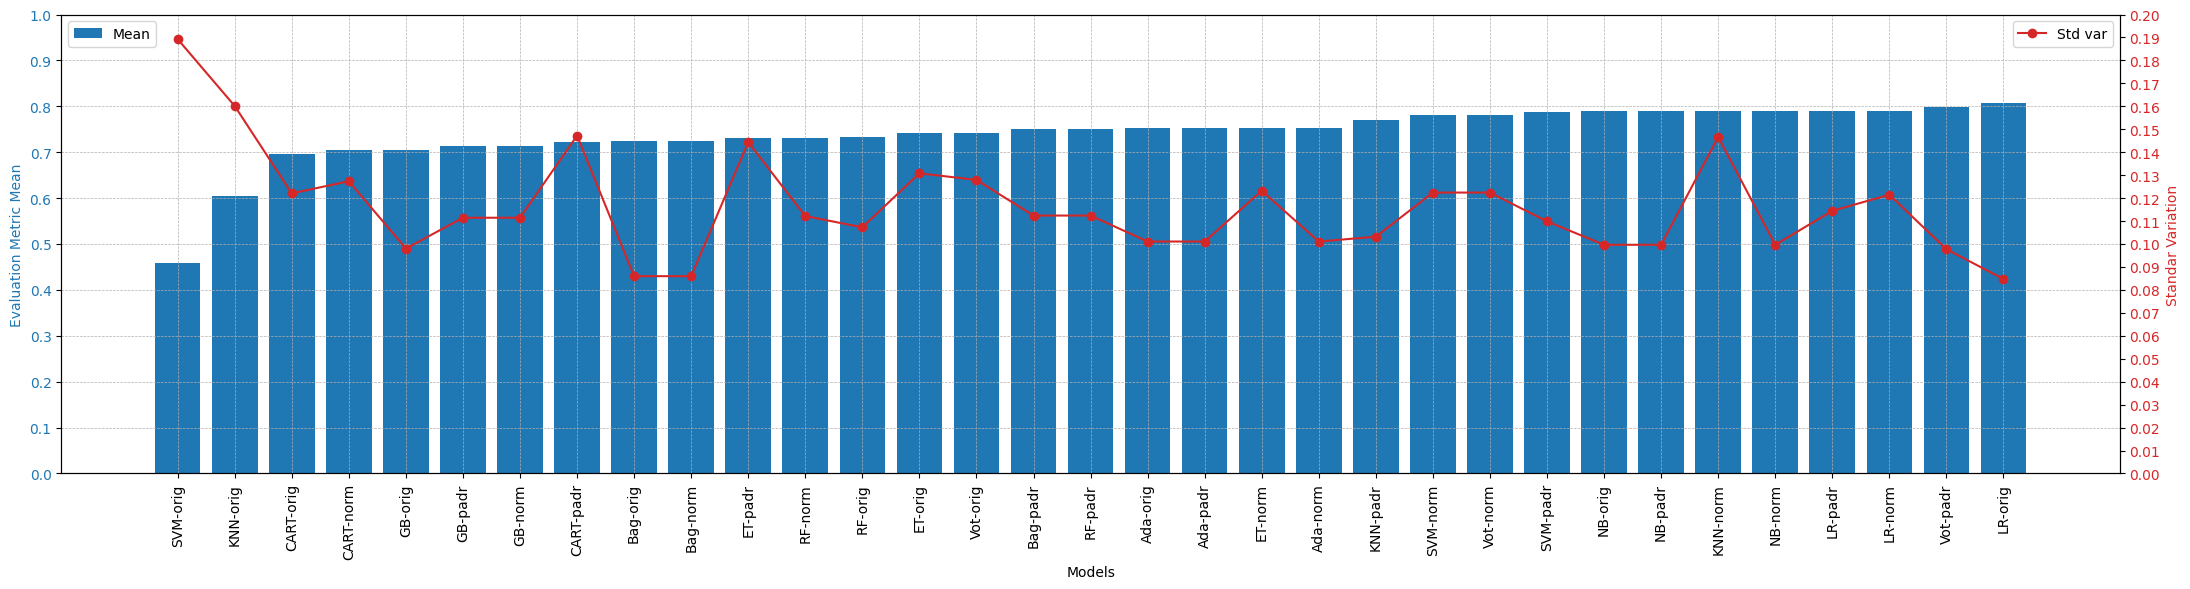

In [336]:
eval_metric_mean_std_plot(pip_results, pip_names)

## 5.1 Feature Selection

In this section we present the results for the models set trained with the features got from different features selection proccess.

###5.1.1 Univariate Feature Selection using SelectKBest

The first feature selection result to analyze is the univariate feature selection using the ANOVA F-value test. We will start analyzing the results using just 4 features, which are `thal`, `cp`, `ca` and `exang`.

This first result is strange. Several models resulted in the same cross validation recall mean and the same standard variation. We will not consider these models as valid for our final model candidates. It is required an investigation to understand why this set has present this result pattern.

['thal', 'cp', 'ca', 'exang']


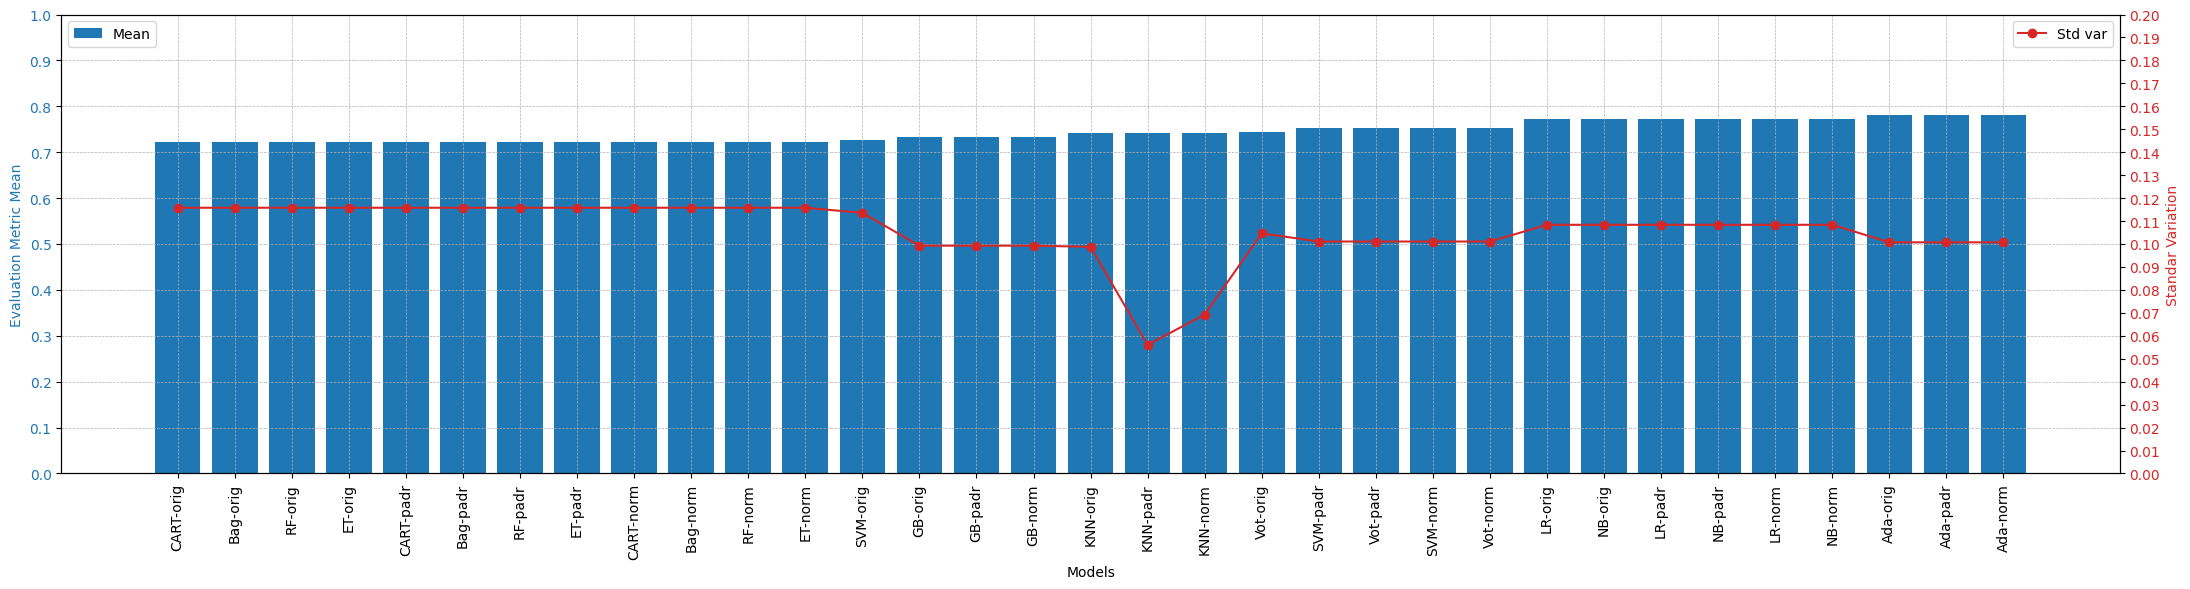

In [337]:
print(kbst_feature_names_sorted[0:4])
eval_metric_mean_std_plot(kbst_pip_results_4,  kbst_pip_names_4)

The next result become reliable again, since the same cross validation recall mean and standard variation are no present anymore. Here we are analyzing the models results using the 7 best features by adding `oldpeak`, `thalach` and `slope` to our selected features list. In this case, we noticed that all versions of the Naive Bayes model (using original, standardized and normalized dataset) has presented the same cross validation racall mean and standard variation. Therefore, we can conclude that this algorithm is not very sensitive to data transformation such as standardization and normalization. These algorithm, aswell as linear regression using normalized dataset, are good candidates to our final model.

['thal', 'cp', 'ca', 'exang', 'oldpeak', 'thalach', 'slope']


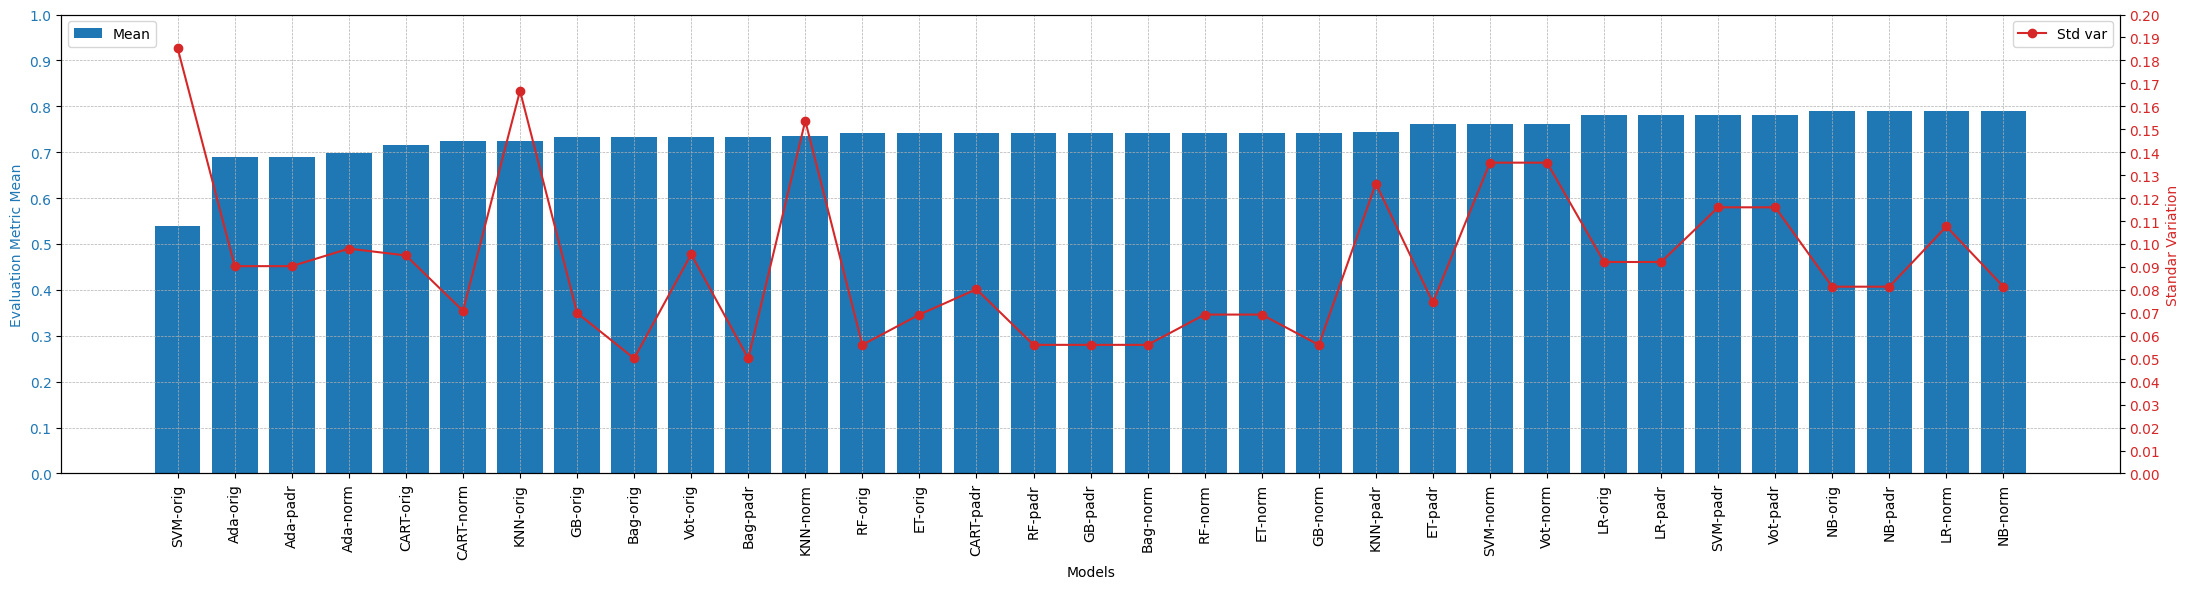

In [338]:
print(kbst_feature_names_sorted[0:7])
eval_metric_mean_std_plot(kbst_pip_results_7,  kbst_pip_names_7)

By adding `sex`, `age`, `restecg` to our list of features selected, we noticed that the K Neighbors algorithm using a normalized dataset become a good option too for our final model candidate.

['thal', 'cp', 'ca', 'exang', 'oldpeak', 'thalach', 'slope', 'sex', 'age', 'restecg']


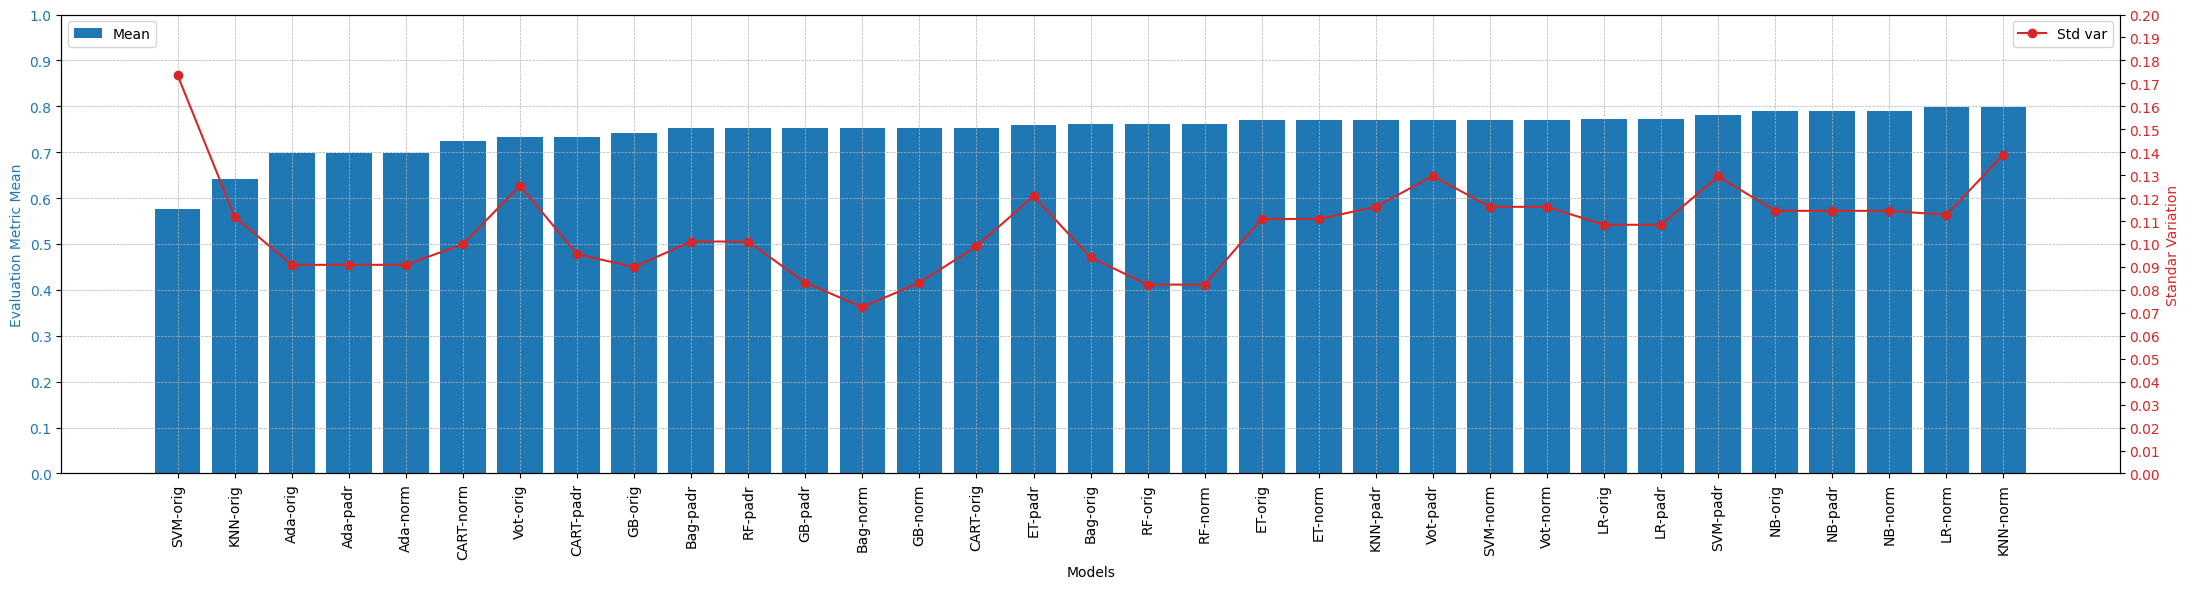

In [339]:
print(kbst_feature_names_sorted[0:10])
eval_metric_mean_std_plot(kbst_pip_results_10, kbst_pip_names_10)

###5.1.2 Recursive Feature Elimination

In this section we will analyze the results using the features selected by recursive feature elimination using three different estimators

####5.1.2.1 Logistic Regression Estimator

Using the 4 best features (`sex`, `exang`, `slope` and `ca`) with logistic regression as recusrive feature elimination estimator, the results has presented the same strange pattern as univariate feature selection with 4 features. Now we start to presume that 4 features may not be enough to modeling the problem we are working on. This results will not be considered aswell to our final model candidate.

['sex' 'exang' 'slope' 'ca']


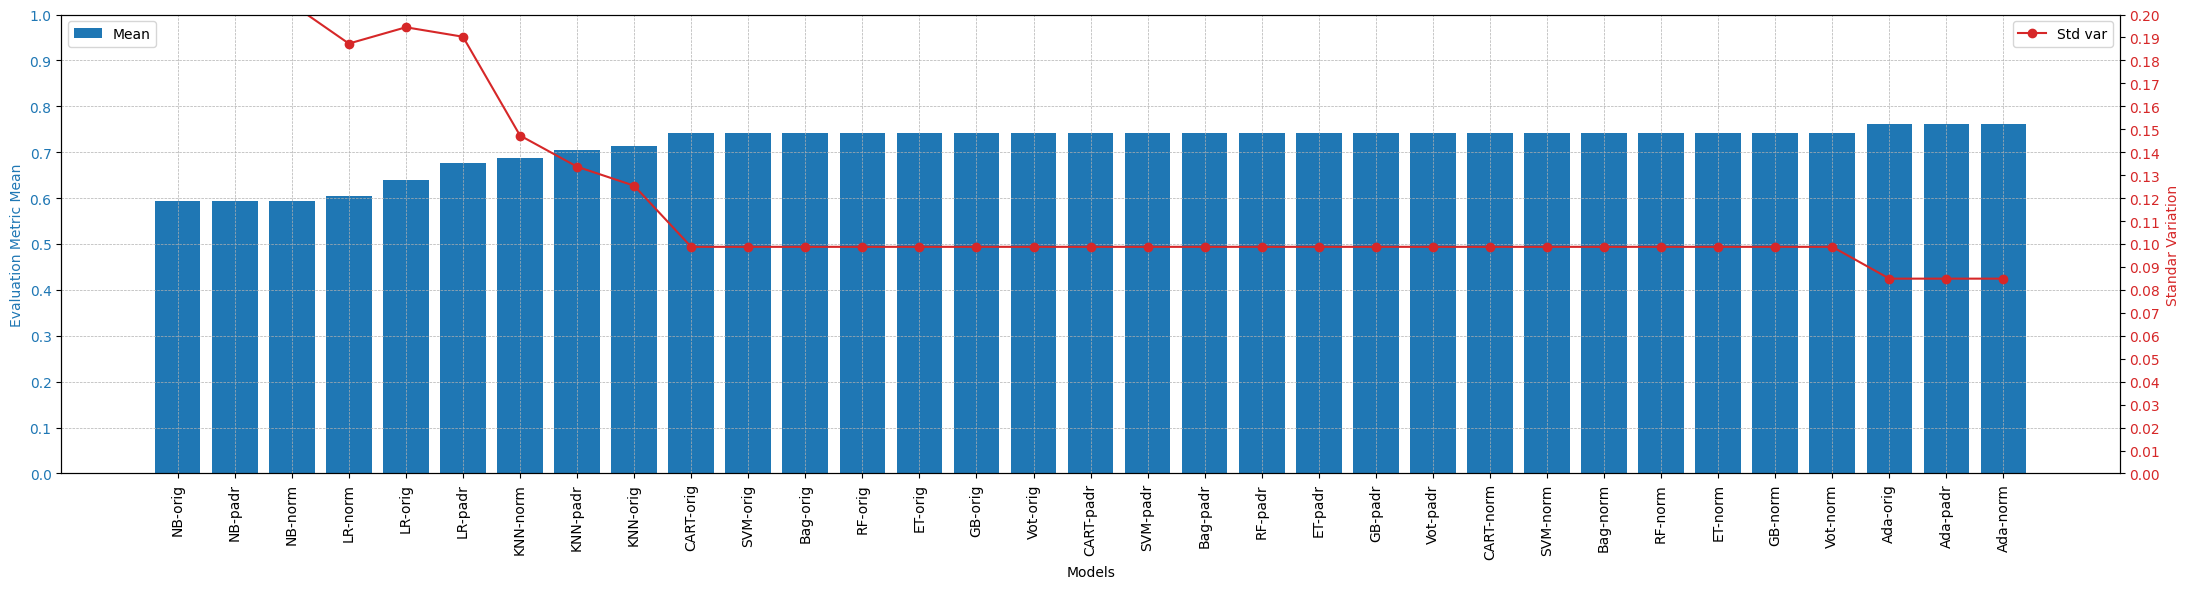

In [340]:
print(rfe_features_names_lr[0:4])
eval_metric_mean_std_plot(rfe_pip_results_4_lr, rfe_pip_names_4_lr)

By adding `cp`, `fbs` and `thal` to our features selected list, we got a reliable result again. As the worst model in this case has presented a cross validation recall mean higher than 0.7, we can think that this may be the best features set to train the models. But, all models performin so well as in this case could lead us to keep some suspect on this results reliability. The standard deviation here is what made us assume that this results are reliable.

Also, is important to note that even the models has performed well, we got highers standard deviation, what could not be good to our final model candidate.

['sex' 'exang' 'slope' 'ca' 'cp' 'fbs' 'thal']


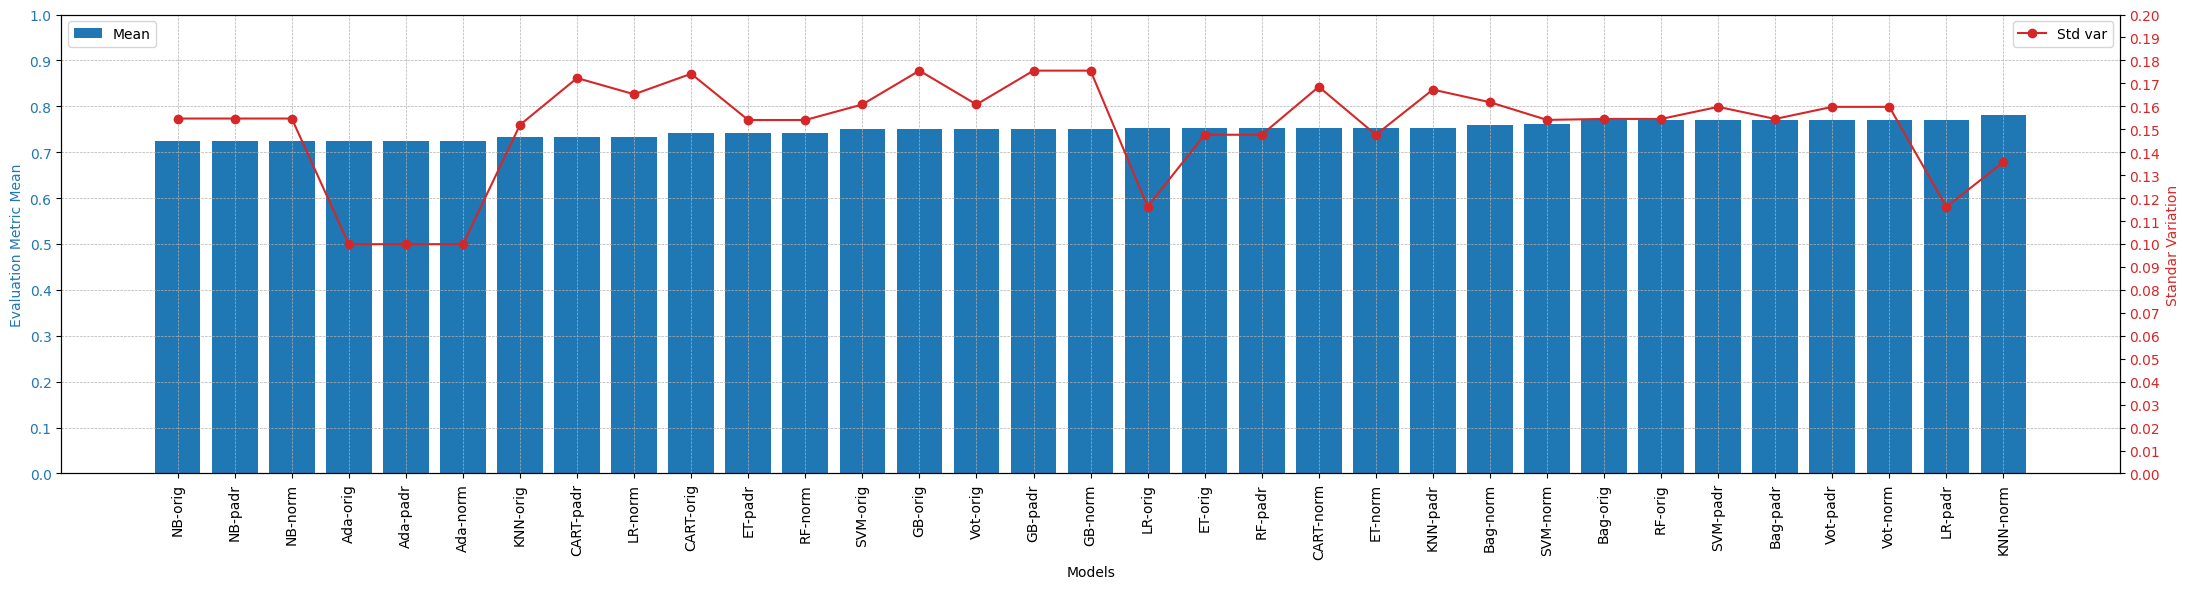

In [341]:
print(rfe_features_names_lr[0:7])
eval_metric_mean_std_plot(rfe_pip_results_7_lr, rfe_pip_names_7_lr)

Our final features selected list for logistic regression estimator includes `restecg`, `thalach` and `oldpeak` to our selected features list. Now we noticed that the standard deviations presented here are lower than the last results presented. This lead us to think that more features make our models more precise, an analysis on precision evaluation score could answer this hipotesis. But here we can observe that Naive Bayes keep being a good final model candidate.

['sex' 'exang' 'slope' 'ca' 'cp' 'fbs' 'thal' 'restecg' 'thalach'
 'oldpeak']


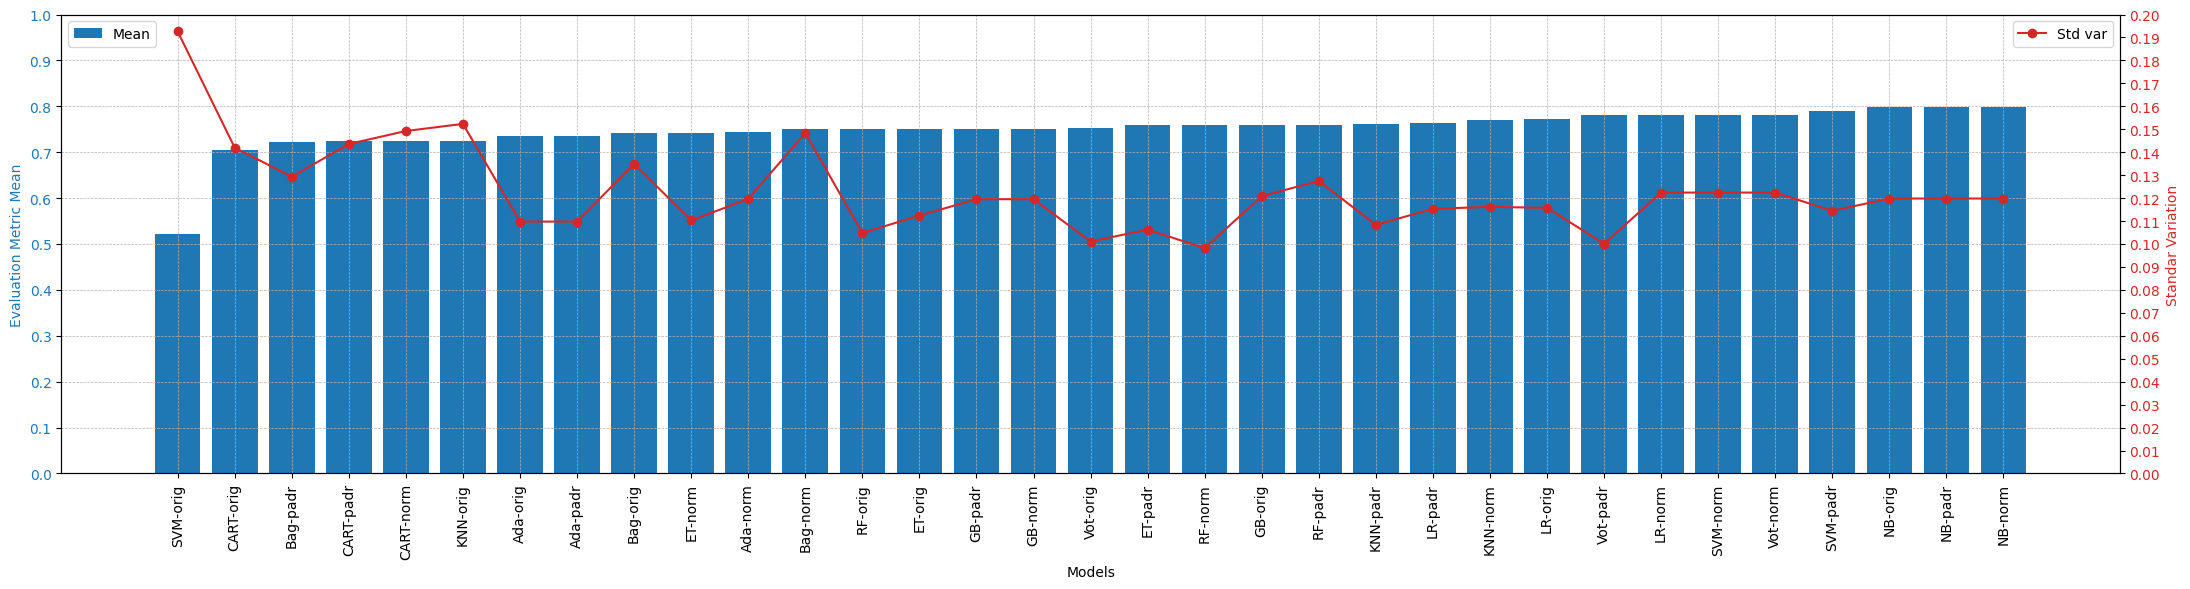

In [342]:
print(rfe_features_names_lr[0:10])
eval_metric_mean_std_plot(rfe_pip_results_10_lr, rfe_pip_names_10_lr)

####5.1.2.2 SVM Estimator

Now we change the recursive feature elimination estimator from logistic regression to support machine vectors. By analyzing the features selected list, we noticed that is the same as logistic regression estimator with 4 features selected. So the analysis is the same, the results are not reliable and will not be considered to our final model candidate.

['sex' 'exang' 'slope' 'ca']


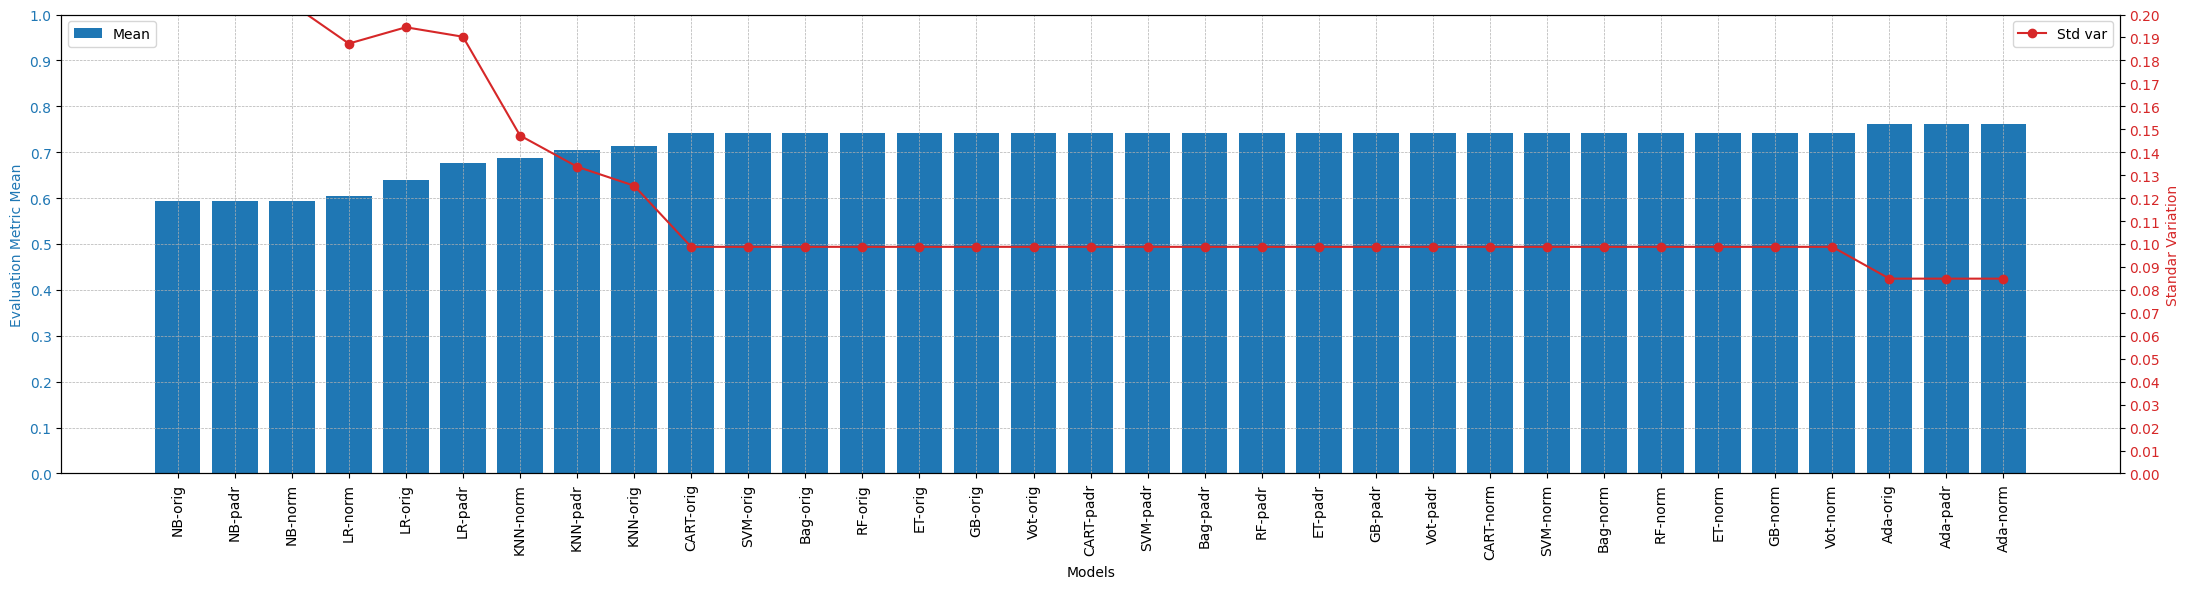

In [343]:
print(rfe_features_names_svm[0:4])
eval_metric_mean_std_plot(rfe_pip_results_4_svm, rfe_pip_names_4_svm)

By analyzing the list for 7 features selected using support machine vectors as estimator, we noticed that, again, is the same as presented by the logistic regression estimator. So the analysis is the same.

['sex' 'exang' 'slope' 'ca' 'cp' 'fbs' 'thal']


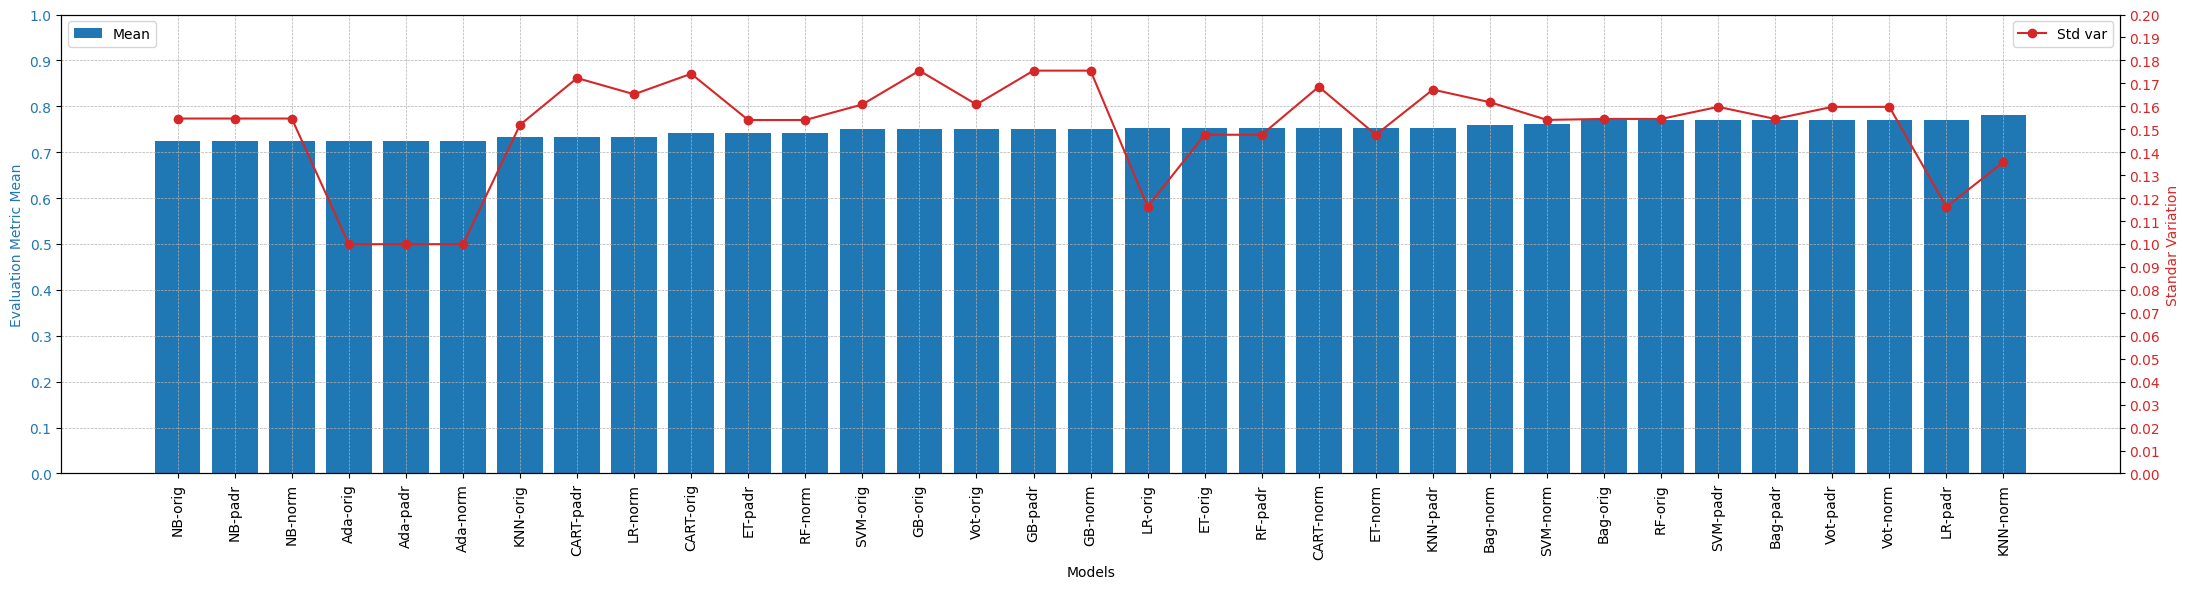

In [344]:
print(rfe_features_names_svm[0:7])
eval_metric_mean_std_plot(rfe_pip_results_7_svm, rfe_pip_names_7_svm)

The list of 10 features selected by the support machine vectors estimator adds `trestbps`, `restecg` and `oldpeak`. The difference between the list provided by support machine vectors estimator and the list provided by logistic regression estimator is that now we have `trestbps` instead of `thalach` in our features selected list. Here what comes to light is that support machine vector algorithm using a standardized dataset was extremely penalized by the feature change. Also, the Naive Bayes algorithm was penalized, since it was the best algorithm with `thalach` in the feature selected list and now it drops position leaving the first two to adaboost with normalized dataset and support machine vector with standardized dataset.

['sex' 'exang' 'slope' 'ca' 'cp' 'fbs' 'thal' 'trestbps' 'restecg'
 'oldpeak']


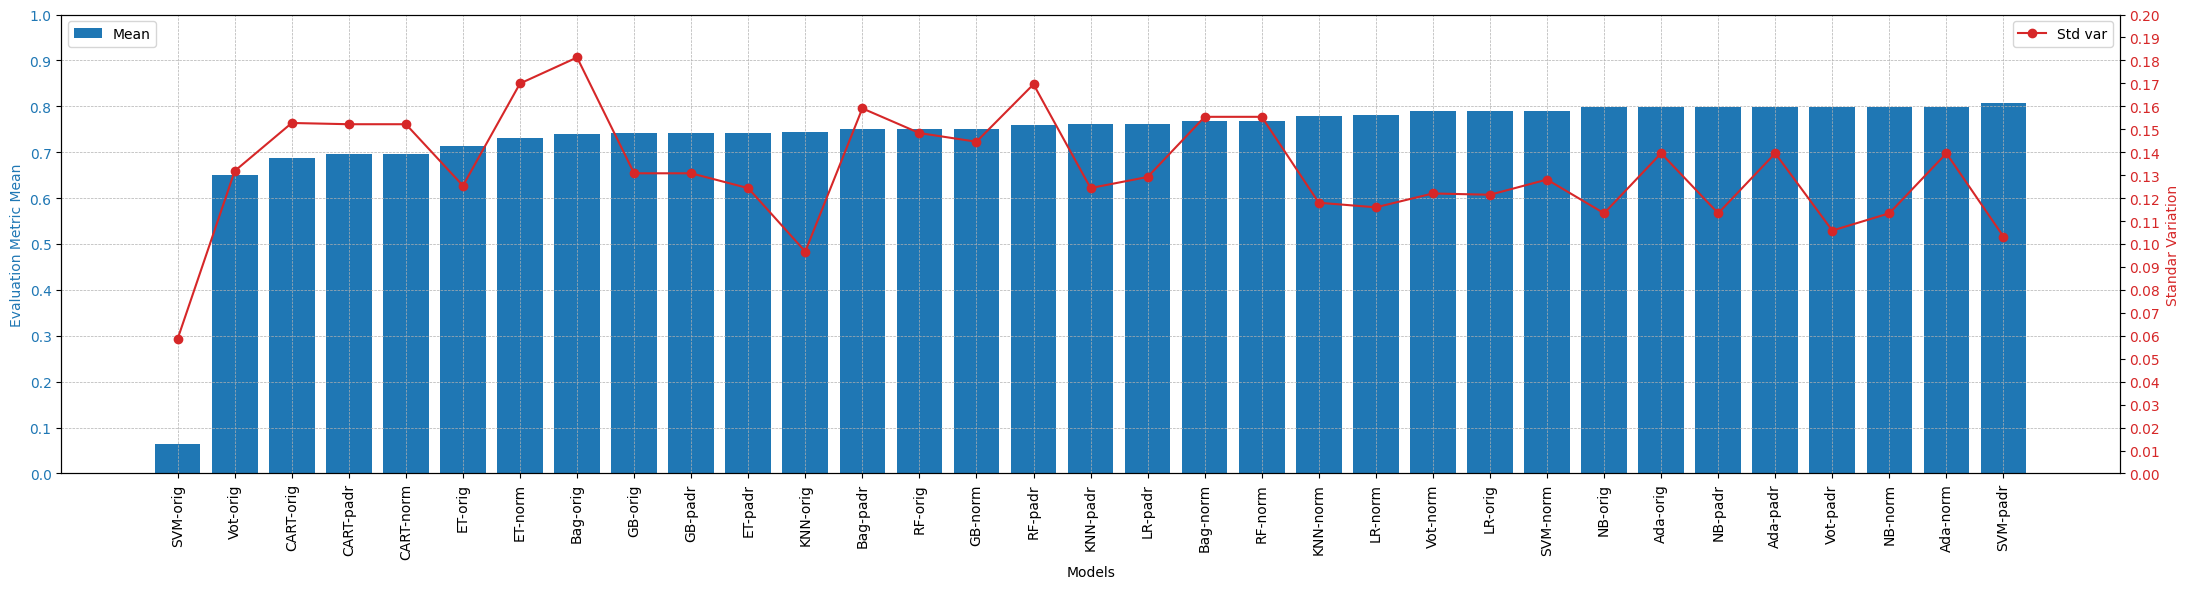

In [345]:
print(rfe_features_names_svm[0:10])
eval_metric_mean_std_plot(rfe_pip_results_10_svm, rfe_pip_names_10_svm)

####5.1.2.3 Random Forest Estimator

The random forest estimator for recursive feature elimination is the first one that presented reliable results by using 4 features, which are `age`, `cp`, `thalach` and `thal`. But even so the cross validation recall mean is not that close to 0.8 as the results prasented by latests tests. So these models may not become a good option for our final model candidate.

['age' 'cp' 'thalach' 'thal']


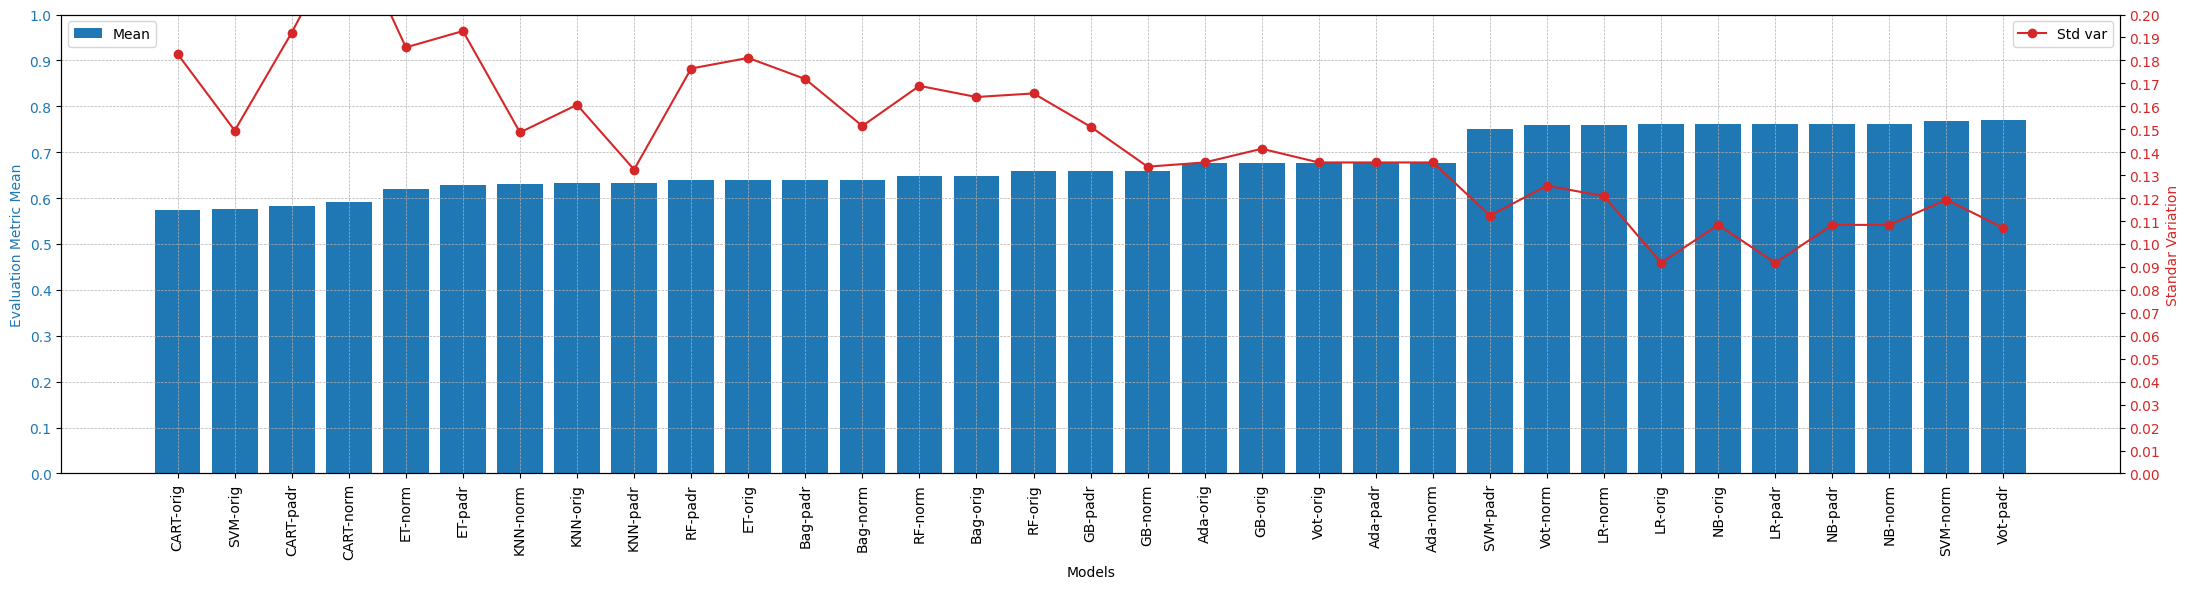

In [346]:
print(rfe_features_names_rf[0:4])
eval_metric_mean_std_plot(rfe_pip_results_4_rf, rfe_pip_names_4_rf)

By adding `trestbps`, `oldpeak` and `ca` to our seletected features list, we noticed that the Naive Bayes had the best performance again, but presented the higher standard deviation, what we understand as a red flag. Since we are working in a heart disease problem, a model with lower standard deviation is desirable.

['age' 'cp' 'thalach' 'thal' 'trestbps' 'oldpeak' 'ca']


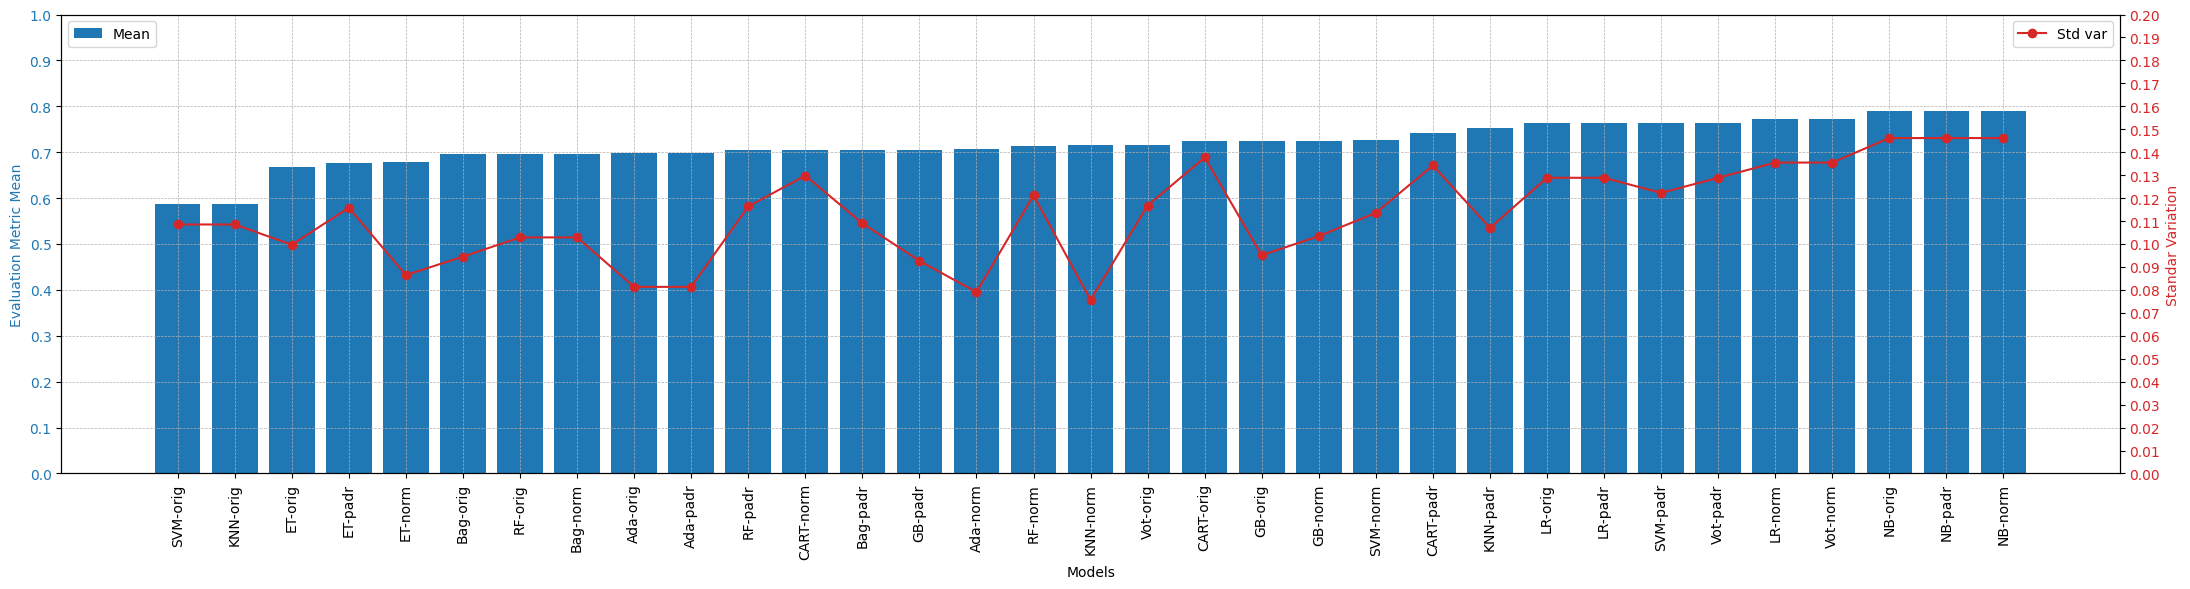

In [347]:
print(rfe_features_names_rf[0:7])
eval_metric_mean_std_plot(rfe_pip_results_7_rf, rfe_pip_names_7_rf)

By adding `ca`, `chol` and `exang` to our features selected list, we noticed a good improvment in the results. We improved the performance of Naive Bayes and decreased the standard deviation. These models is preferred over the last ones.

['age' 'cp' 'thalach' 'thal' 'trestbps' 'oldpeak' 'ca' 'chol' 'exang'
 'slope']


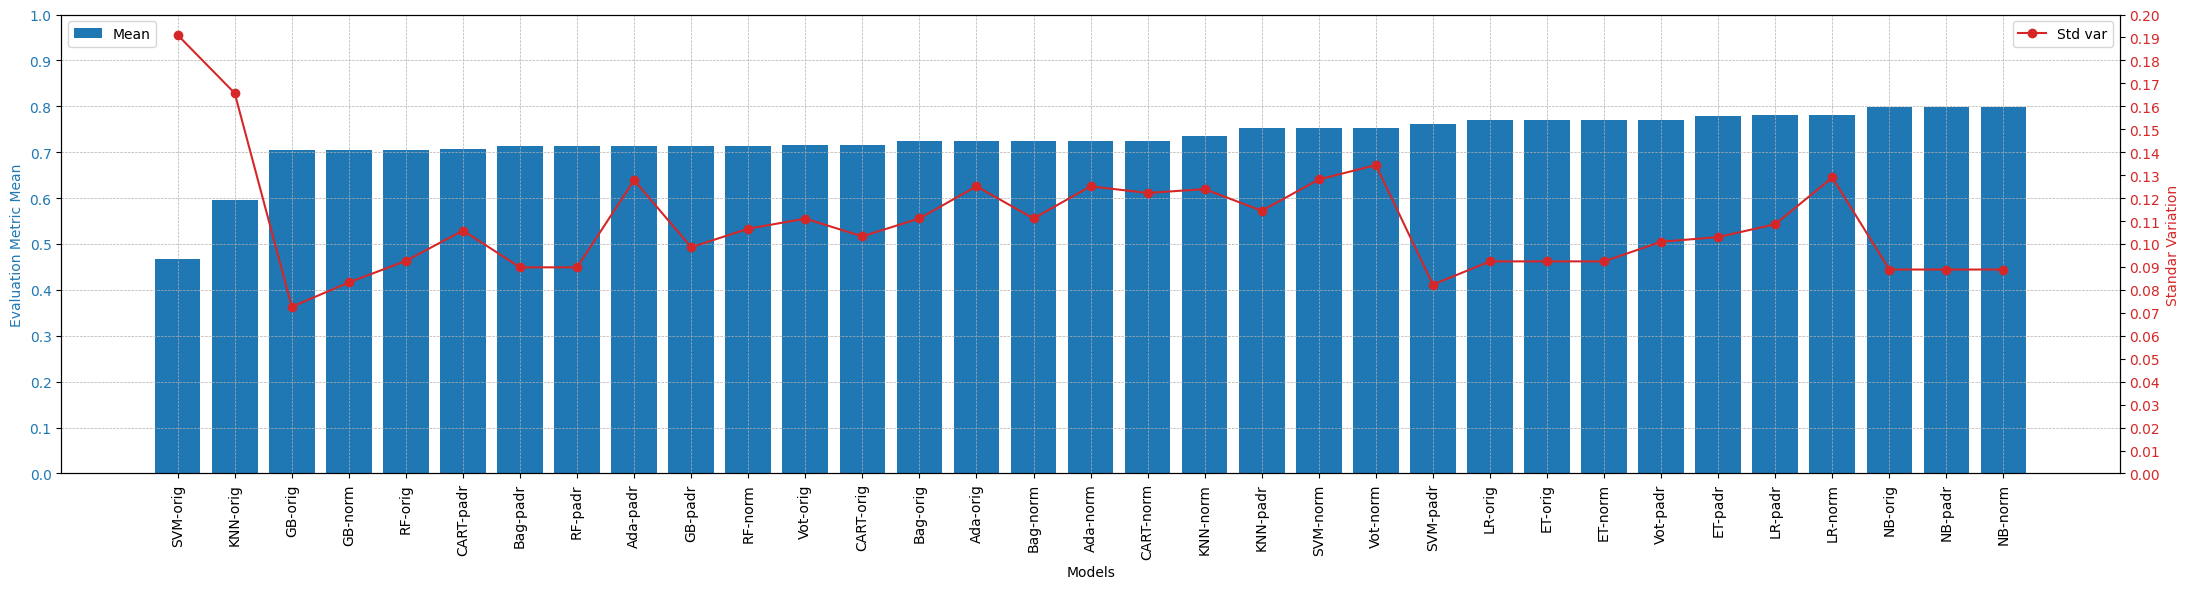

In [348]:
print(rfe_features_names_rf[0:10])
eval_metric_mean_std_plot(rfe_pip_results_10_rf, rfe_pip_names_10_rf)

###5.1.3 Attribute Importace

In this section we will analyze another feature selection approach, the attribute importance using four different estimators

####5.1.3.1 Extra Trees Classifier

First, using extra trees classifier with the 4 best selected features, which are `thal`, `cp`, `ca` and `thalac`, we notice that pattern that is not reliable. So these models will not be considered to our final model candidate.

['thal', 'cp', 'ca', 'thalach']


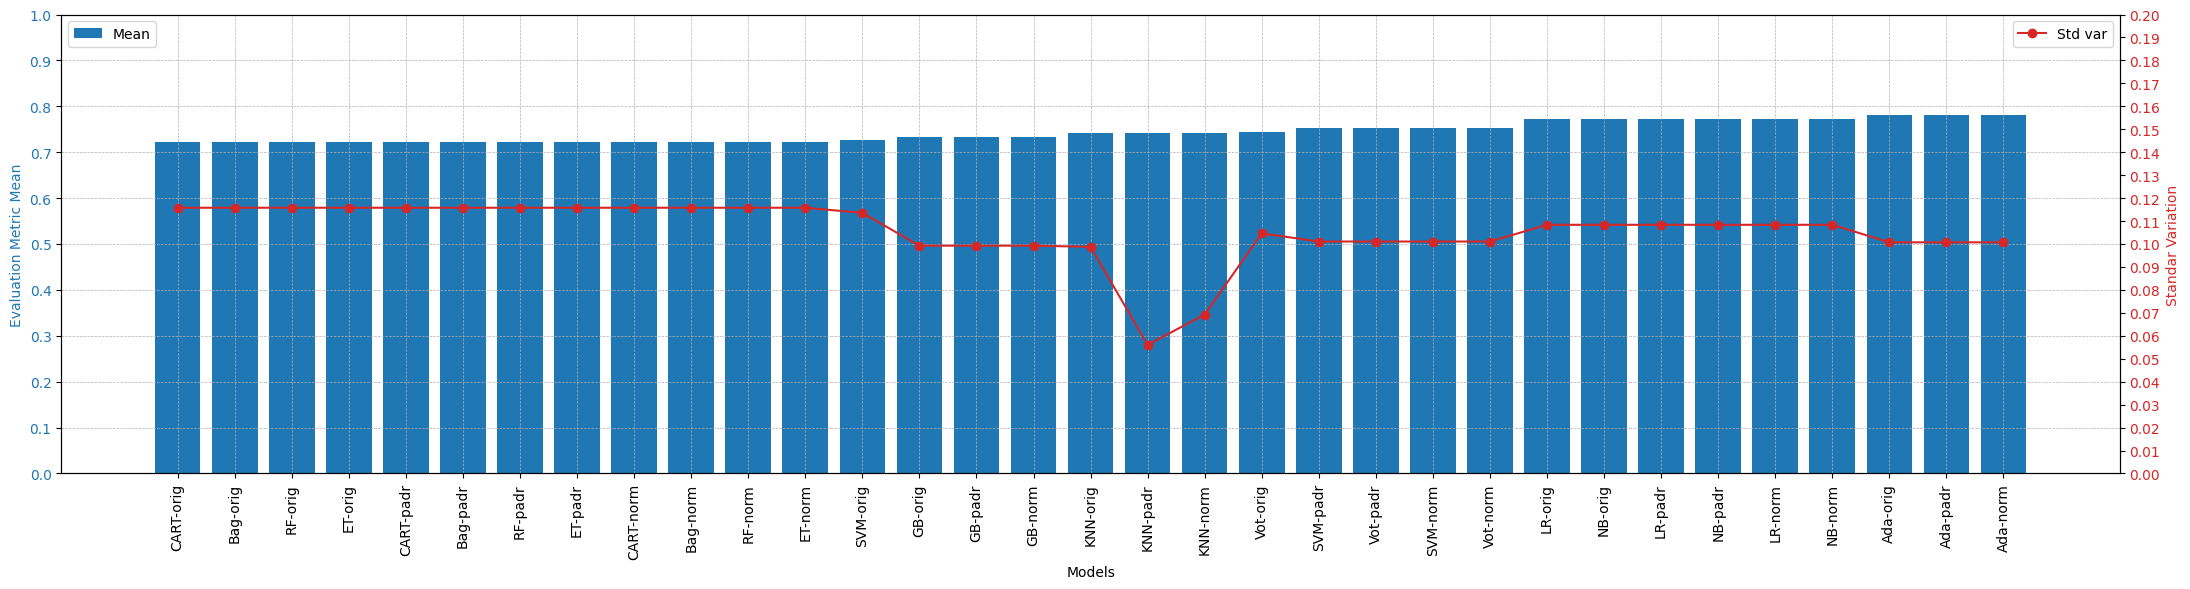

In [349]:
print(ai_names_sorted_et[0:4])
eval_metric_mean_std_plot(ai_pip_results_4_et, ai_pip_names_4_et)

By addin `exang`, `oldpeak` and `age` to our selected features list, we noticed that the results are reliable now, with a good performance and standad deviation for Naive Bayes and logistic regression. These models will be considered to our final models candidate.

['thal', 'cp', 'ca', 'thalach', 'exang', 'oldpeak', 'age']


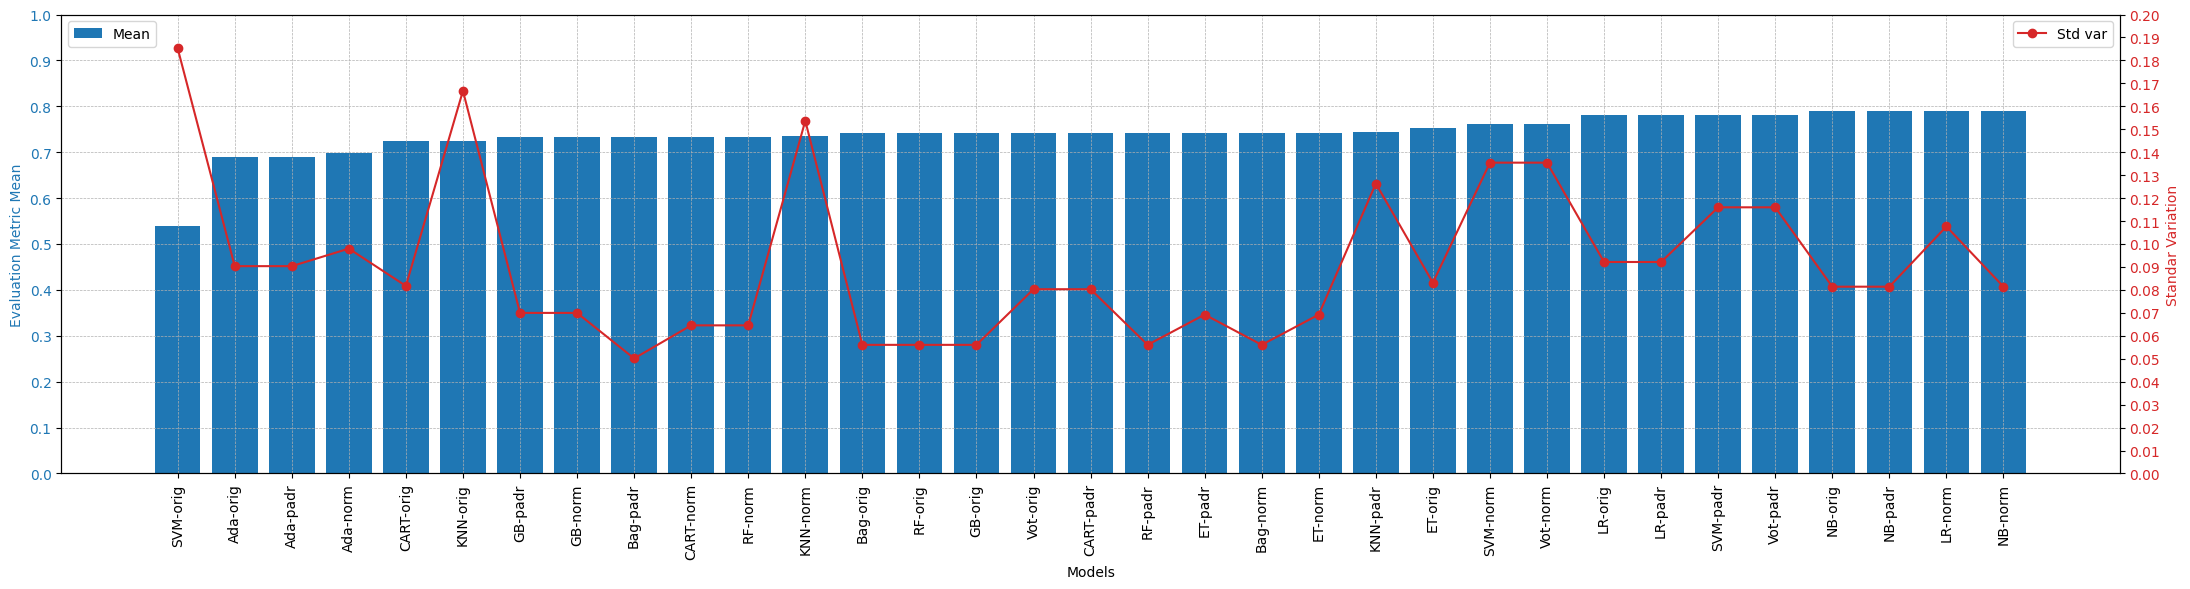

In [350]:
print(ai_names_sorted_et[0:7])
eval_metric_mean_std_plot(ai_pip_results_7_et, ai_pip_names_7_et)

By adding `chol`, `trestbps` and `sex` to our selected features list, we noticed a improvment on Naive Bayes performance with a higher cross validation recall mean and lower standard deviation. We are now understanding that Neive Bayes benefits from a bigger list of selected features.

['thal', 'cp', 'ca', 'thalach', 'exang', 'oldpeak', 'age', 'chol', 'trestbps', 'sex']


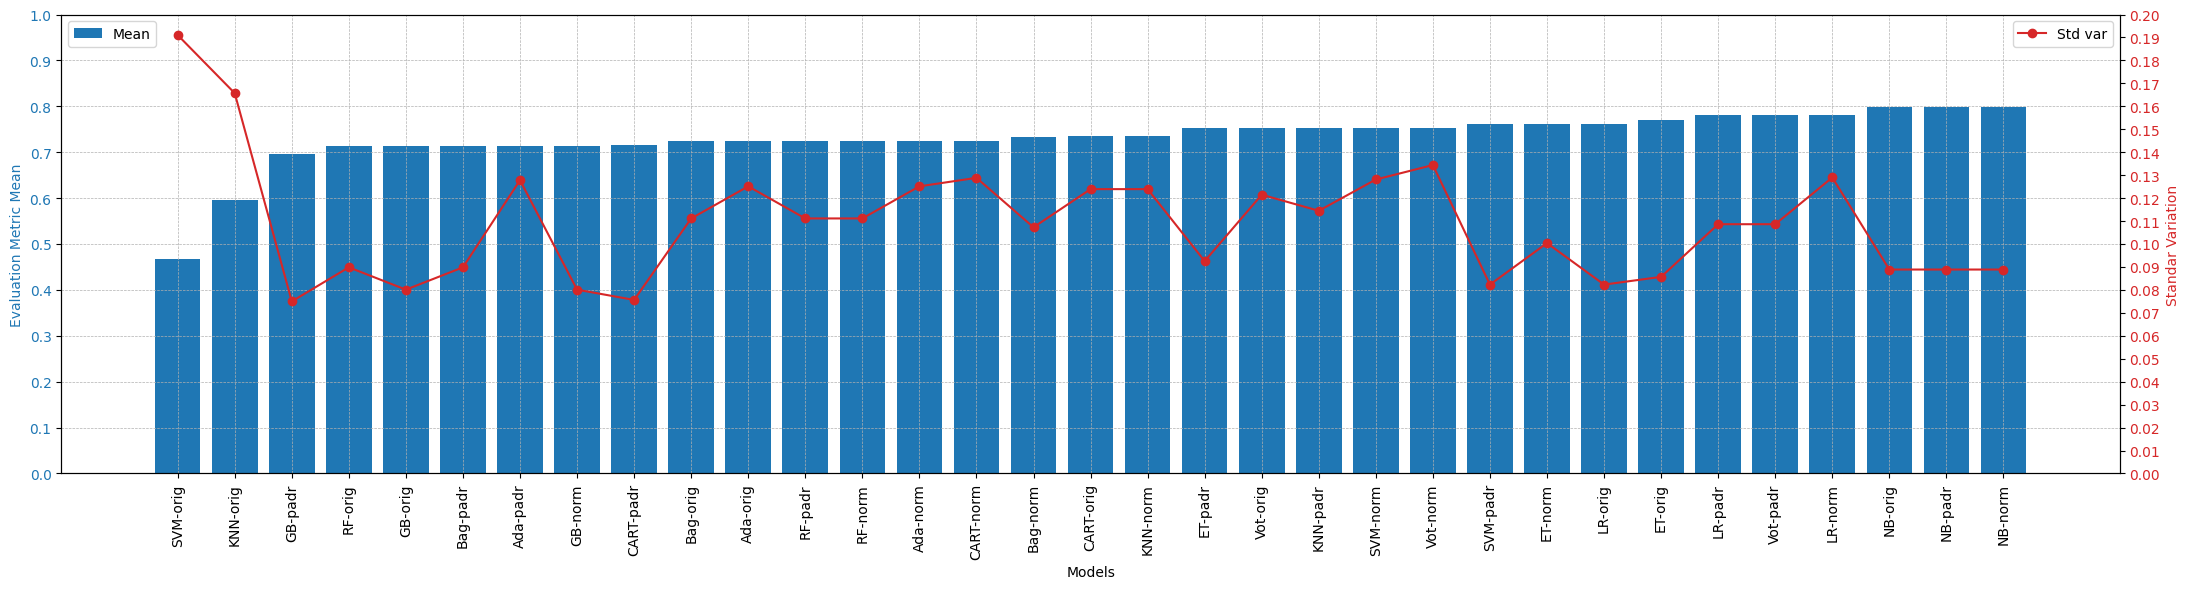

In [351]:
print(ai_names_sorted_et[0:10])
eval_metric_mean_std_plot(ai_pip_results_10_et, ai_pip_names_10_et)

####5.1.3.2 Random Forest Classifier

Again, even that we changed from univariate feature elimination to attribute importance feature selection, the random forest estimator is the first one to present reliable results with the 4 best selected features, which are `thal`, `cp`, `oldpeak` and `ca`. But different from the last feature selection approach, this one has presented a better performance and can be considered a good option to our final model candidate.

['thal', 'cp', 'oldpeak', 'ca']


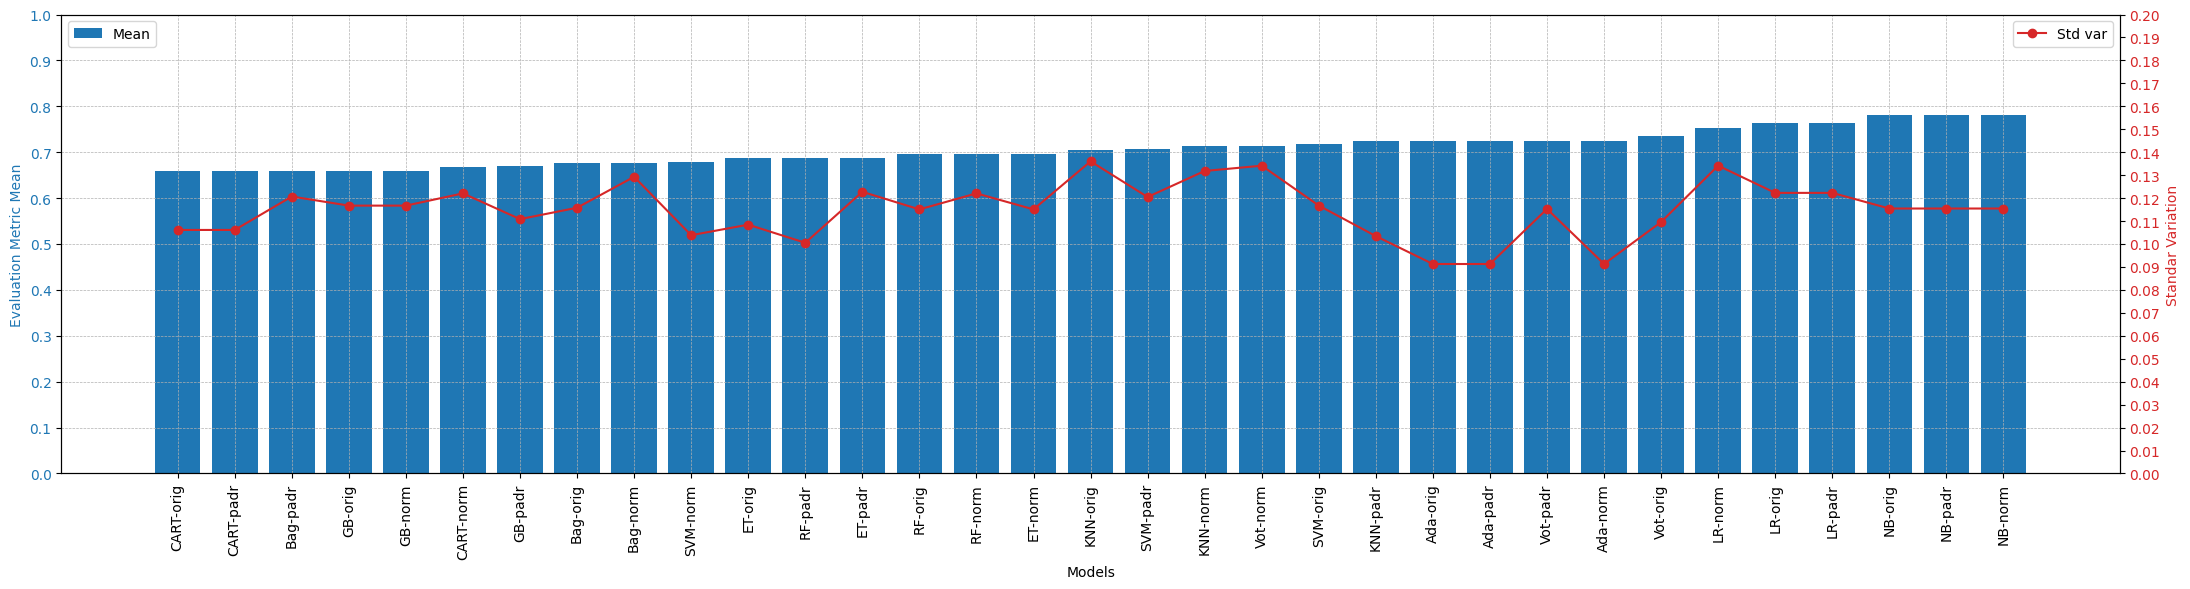

In [352]:
print(ai_names_sorted_rf[0:4])
eval_metric_mean_std_plot(ai_pip_results_4_rf, ai_pip_names_4_rf)

By adding `age`, `thalach` and `trestbps` the our features selected list, we noticed an improvment on Naive Bayes performance with the same standard deviation. Actually, the better models in this set has presented similars standard deviation. We think that a better understand on why the standard deviations are close is needed.

['thal', 'cp', 'oldpeak', 'ca', 'age', 'thalach', 'trestbps']


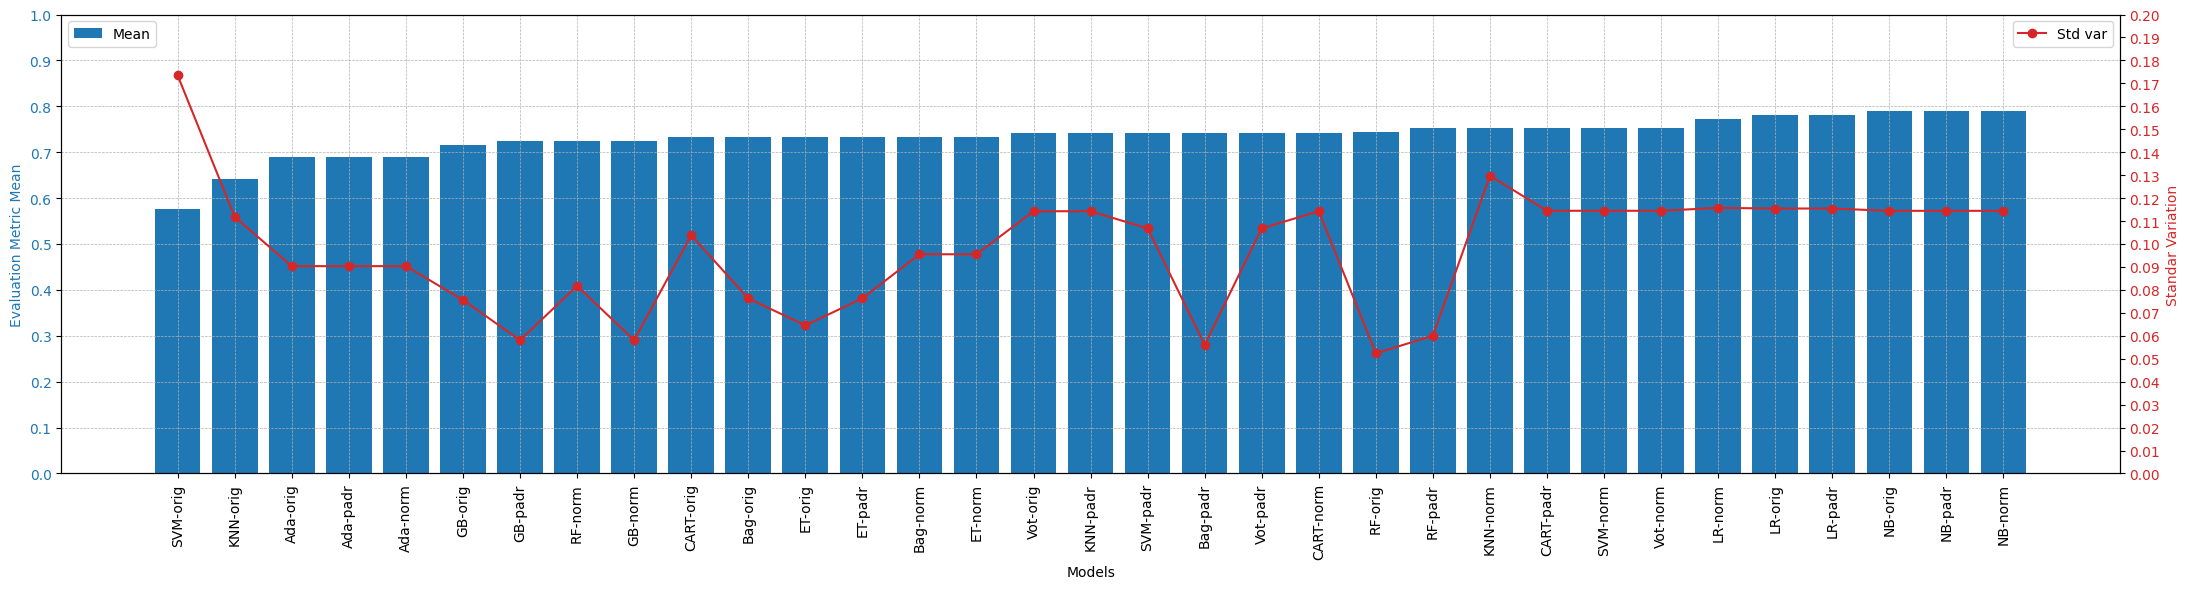

In [353]:
print(ai_names_sorted_rf[0:7])
eval_metric_mean_std_plot(ai_pip_results_7_rf, ai_pip_names_7_rf)

By addint `chol`, `sex` and `exang` to our feature selected list, we noticed that the Naive Bayes performance is now over 0.8, reinforcing our thoughs that Naive Bayes benefits from a feature selected list of 10 features.

['thal', 'cp', 'oldpeak', 'ca', 'age', 'thalach', 'trestbps', 'chol', 'sex', 'exang']


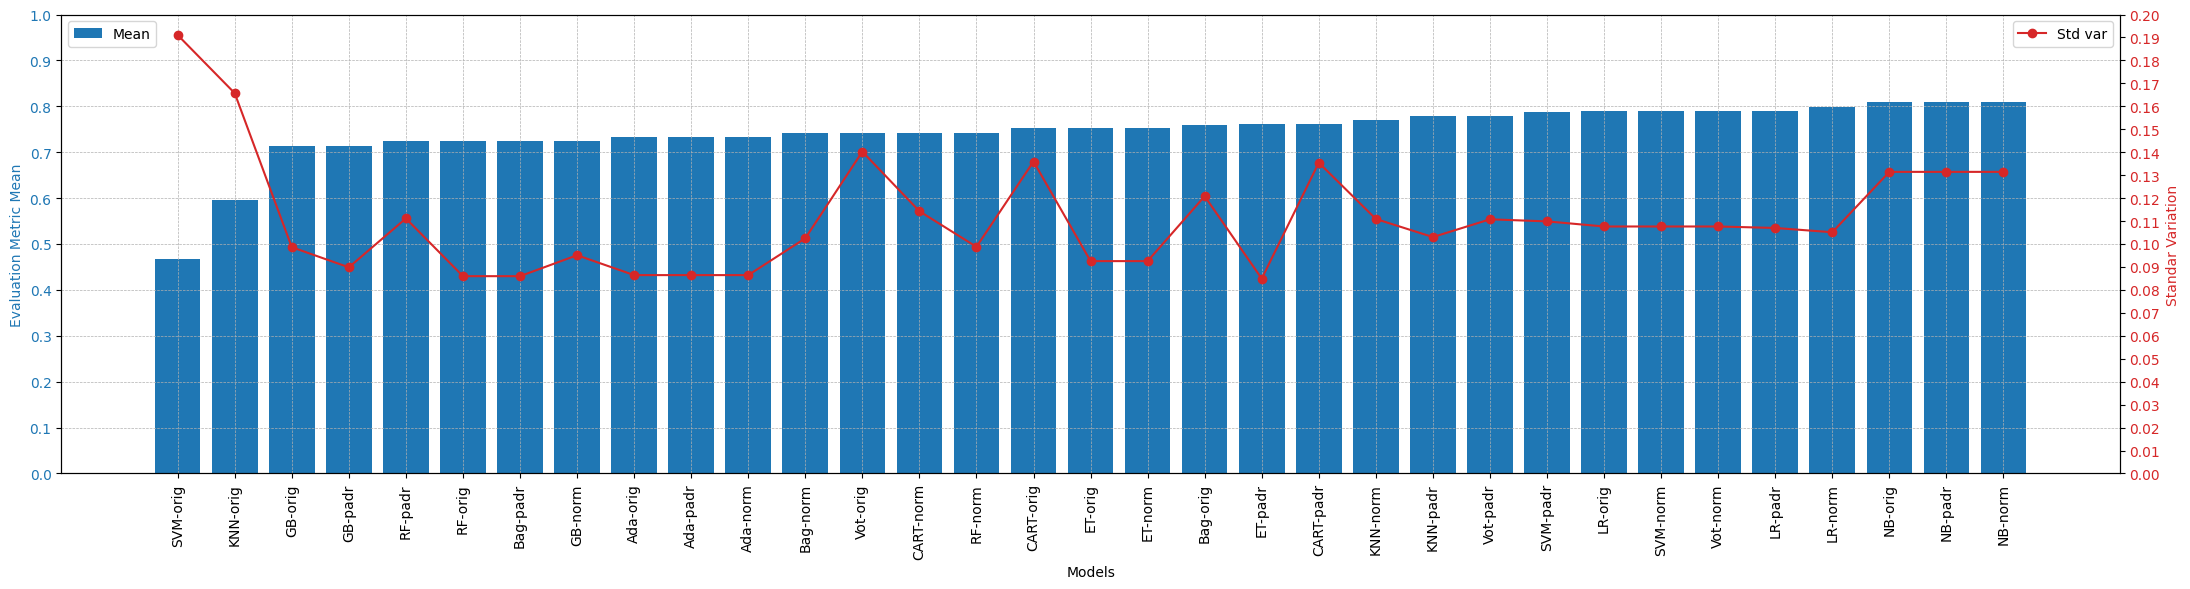

In [354]:
print(ai_names_sorted_rf[0:10])
eval_metric_mean_std_plot(ai_pip_results_10_rf, ai_pip_names_10_rf)

####5.1.3.3 Gradient Boost Classifier

When using gradient boost as classifier for the attribute importance, we got a reulst pattern similar to later results with 4 faetures. In this case the models were trained using `thal`, `cp`, `ca` and `oldpeak` feature selected list. As said before, results with this pattern will not be considered to our final model candidate.

['thal', 'cp', 'ca', 'oldpeak']


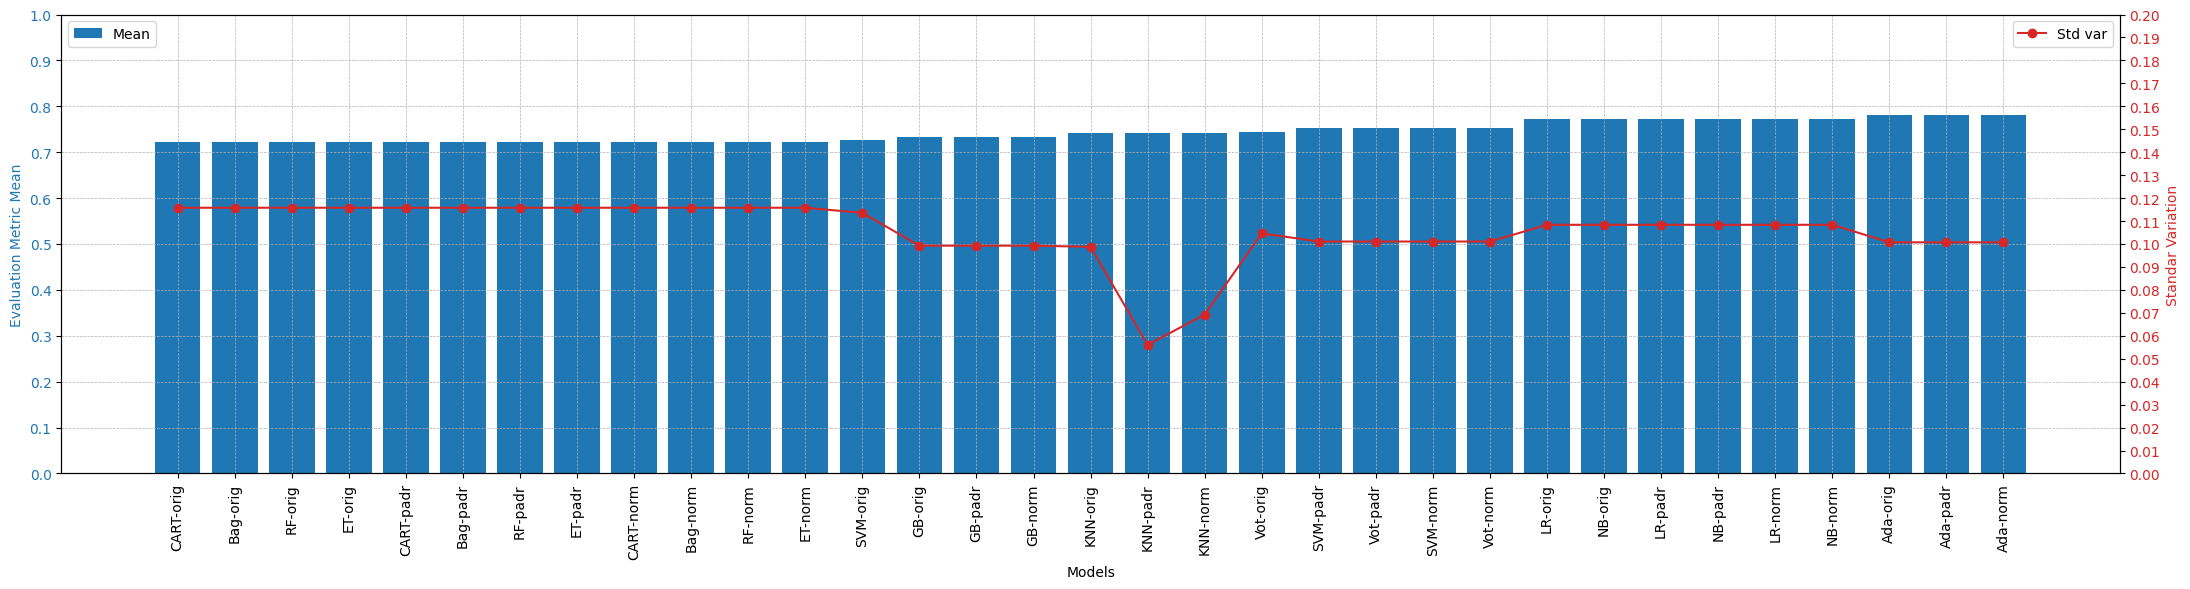

In [355]:
print(ai_names_sorted_gb[0:4])
eval_metric_mean_std_plot(ai_pip_results_4_gb, ai_pip_names_4_gb)

By adding `age`, `thalach` and `trestbps` to our features selected list, we can observe now a reliable result pattern. Here Naive Bayes presents the best performance again, followed by logistic regression. But again all these models presented similar standard deviation, so a better understand of this behavior is needed to ensure that the results are reliable.

['thal', 'cp', 'ca', 'oldpeak', 'age', 'thalach', 'trestbps']


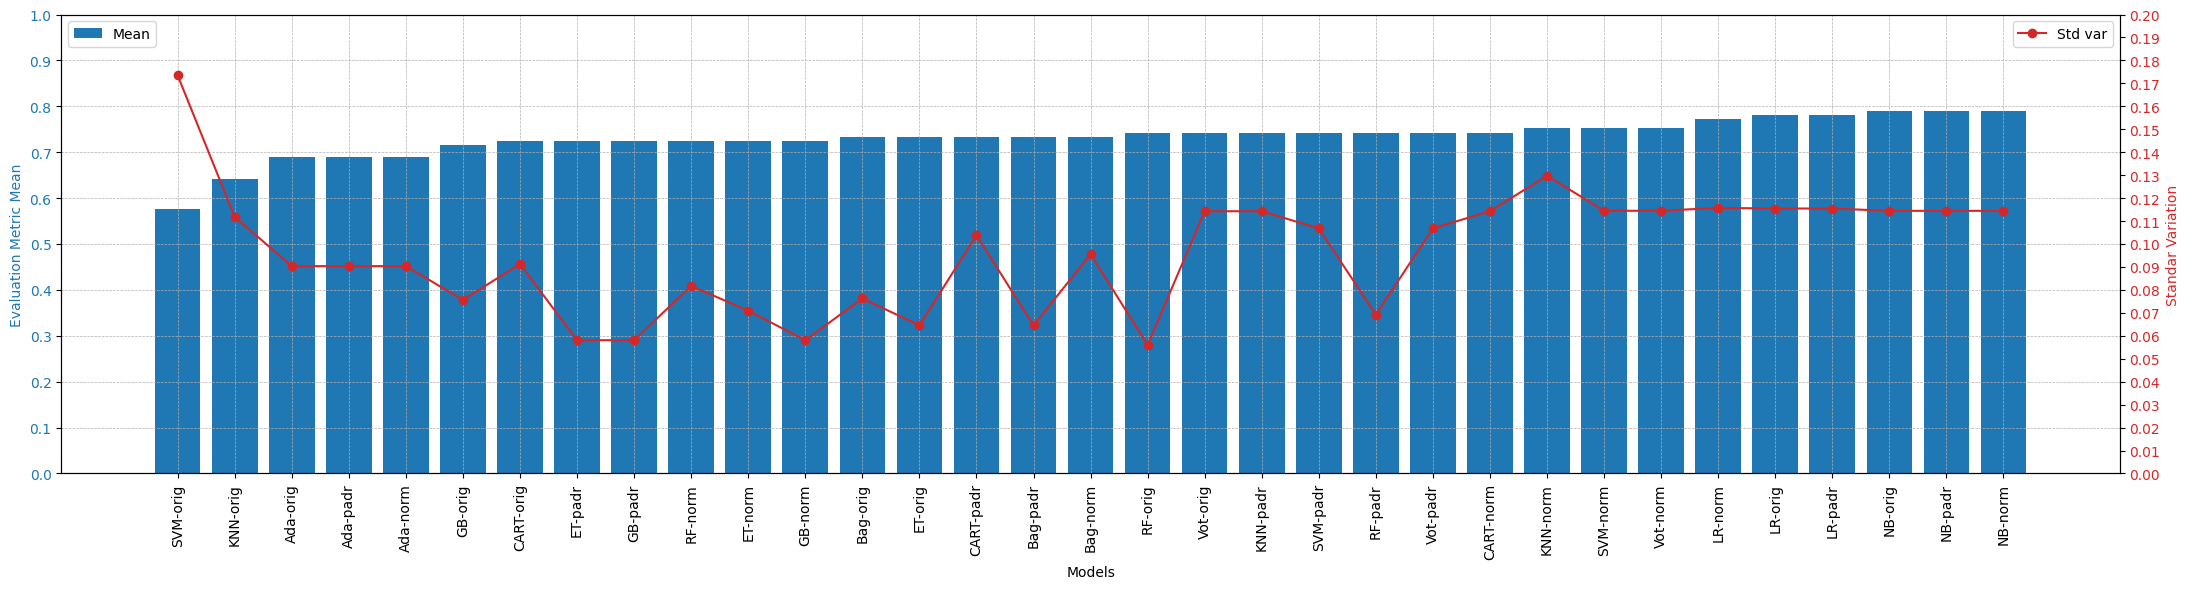

In [356]:
print(ai_names_sorted_gb[0:7])
eval_metric_mean_std_plot(ai_pip_results_7_gb, ai_pip_names_7_gb)

By adding `chol`, `sex` and `slope` to our features selected list, we can observe a better performance of Naive Bayes on cross validation recall mean. Unfortunately, the standard deviation has increased too, which is not desirable.

['thal', 'cp', 'ca', 'oldpeak', 'age', 'thalach', 'trestbps', 'chol', 'sex', 'slope']


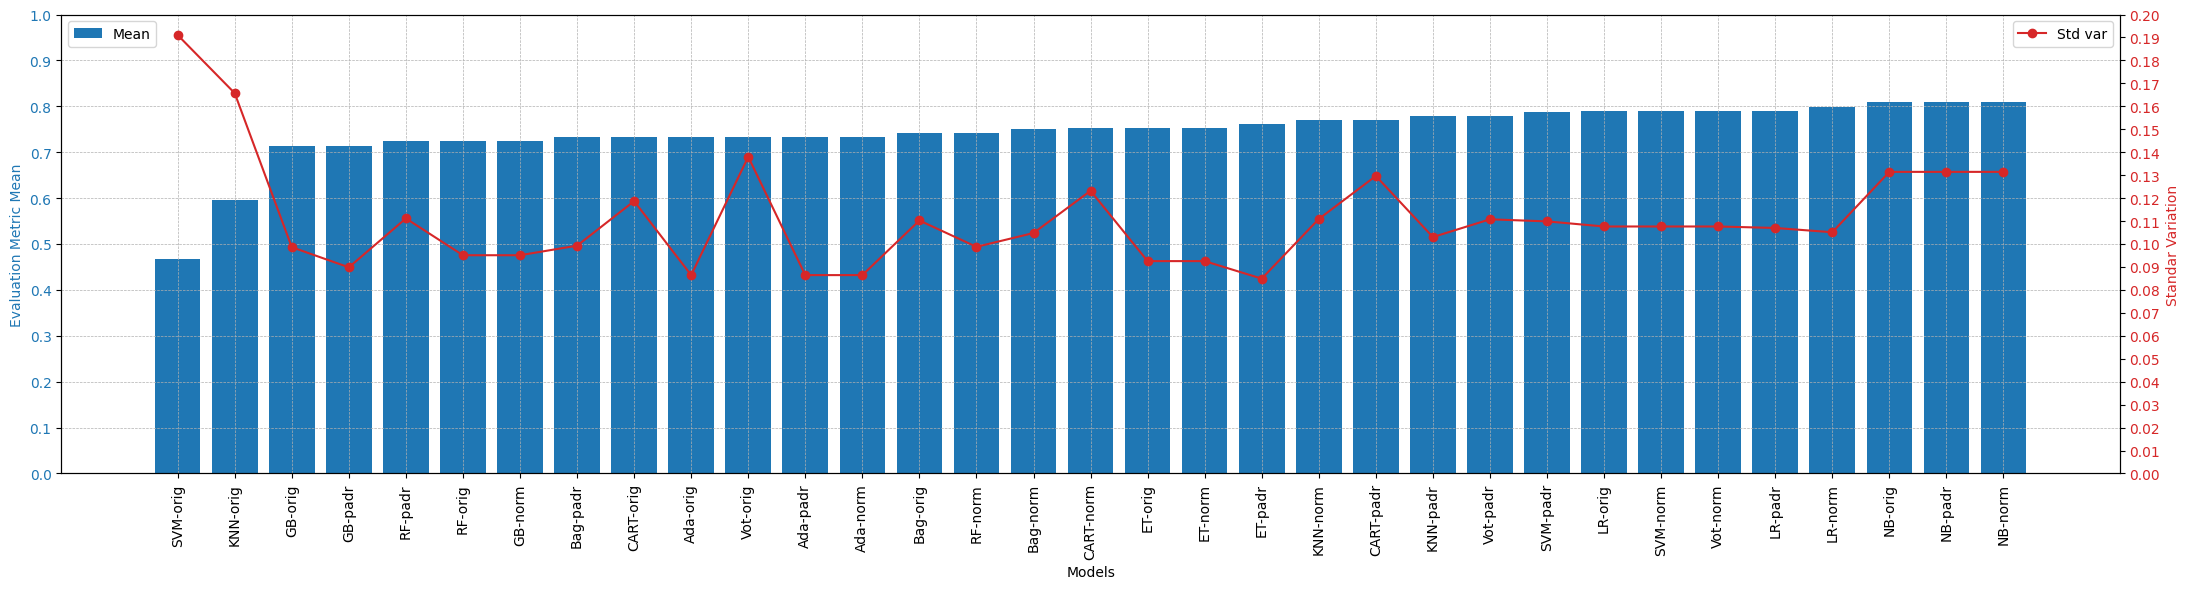

In [357]:
print(ai_names_sorted_gb[0:10])
eval_metric_mean_std_plot(ai_pip_results_10_gb, ai_pip_names_10_gb)

####5.1.3.4 Decision Tree Classifier

When changing the attribute importance classifier to decision tree, the first 4 features selected are `thal`, `thalach`, `cp` and `age`. Different from almost all models trained with 4 features before, this one seems to present a reliable results pattern. With Naive Bayes and logistic regression showing a better performance on cross validation recall mean over the other models. But these models also presents a high standard deviation.

['thal', 'thalach', 'cp', 'age']


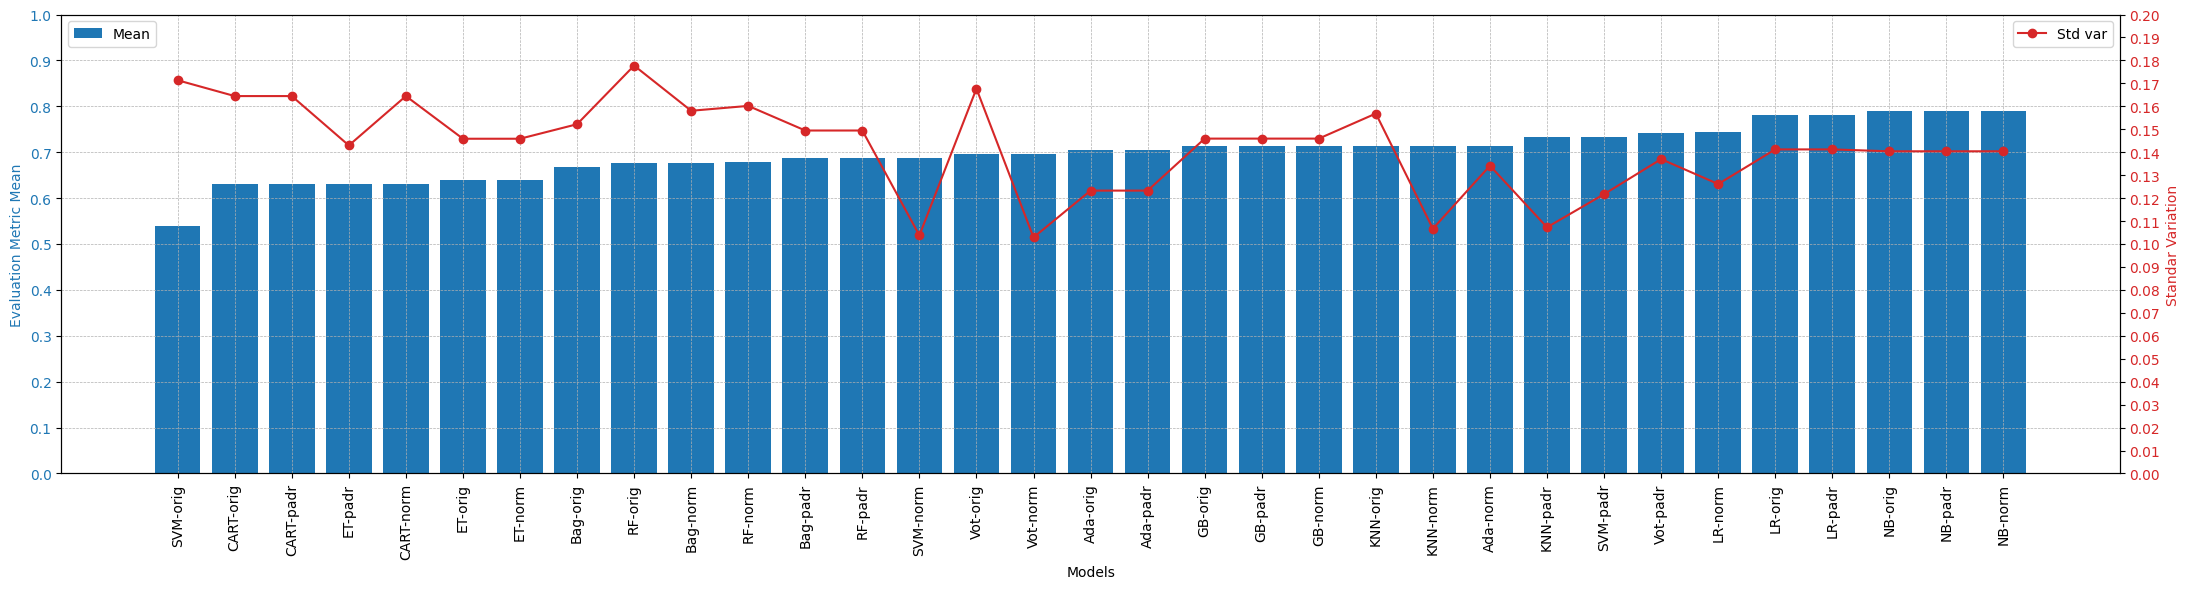

In [358]:
print(ai_names_sorted_dt[0:4])
eval_metric_mean_std_plot(ai_pip_results_4_dt, ai_pip_names_4_dt)

By adding `oldpeak`, `sex` and `chol` to our selected feature list, we noticed that this was good for Naive Bayes algorithm, since the mean has increase while the standard deviation had a little drop. This new selected feature list was good for voting ensamble too, since its performance is better than logistic regression now.

['thal', 'thalach', 'cp', 'age', 'oldpeak', 'sex', 'chol']


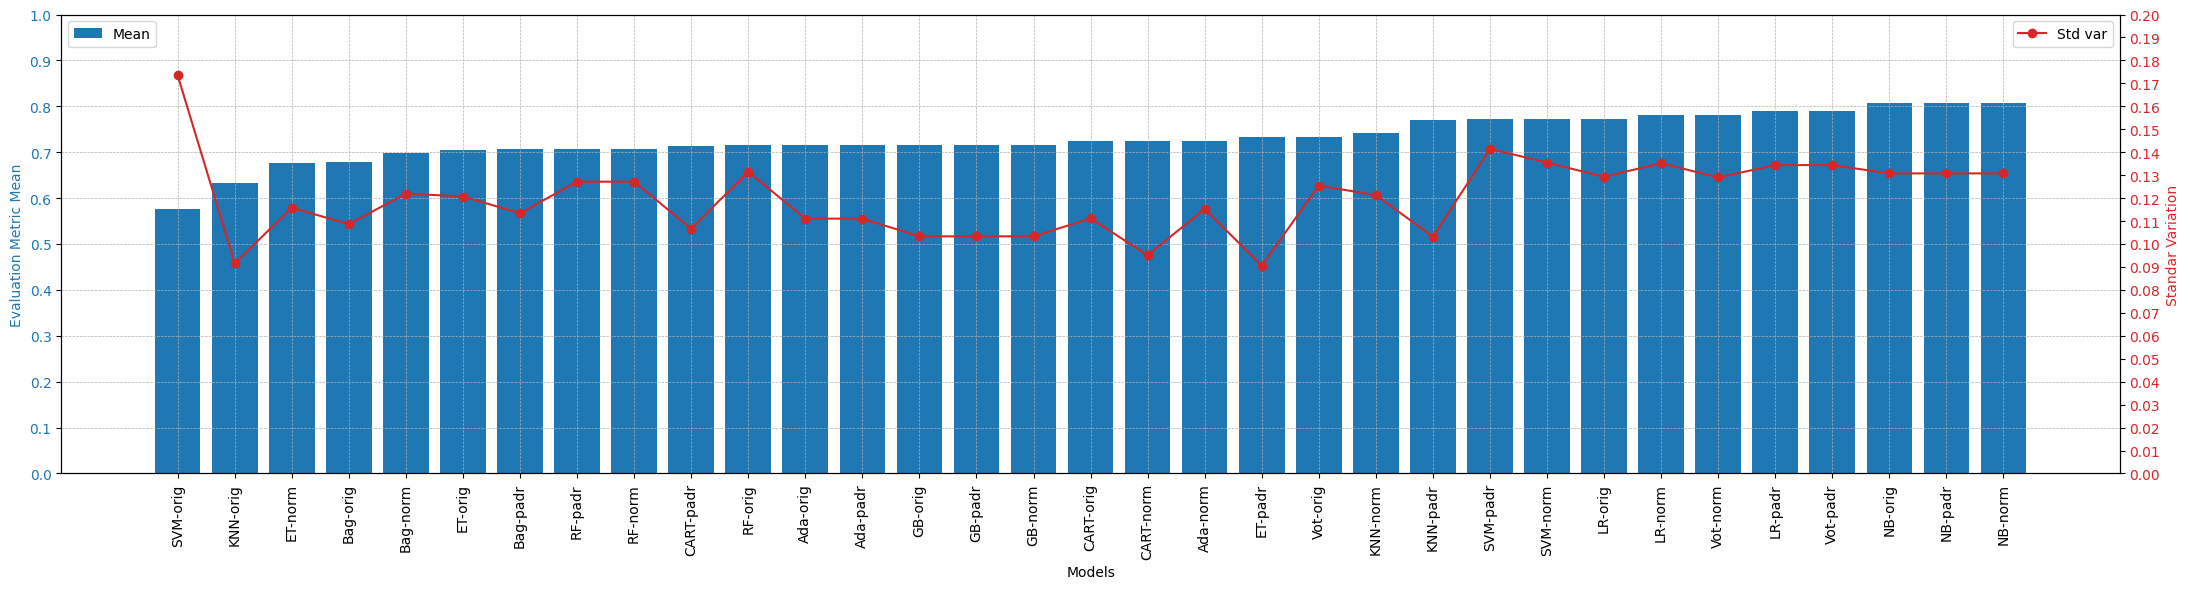

In [359]:
print(ai_names_sorted_dt[0:7])
eval_metric_mean_std_plot(ai_pip_results_7_dt, ai_pip_names_7_dt)

Adding `ca`, `trestbps` and `restecg` to out selected features list has no impact on Naive Bayes performance, but now logisct regression is performing better than voting ensamble again.

['thal', 'thalach', 'cp', 'age', 'oldpeak', 'sex', 'chol', 'ca', 'trestbps', 'restecg']


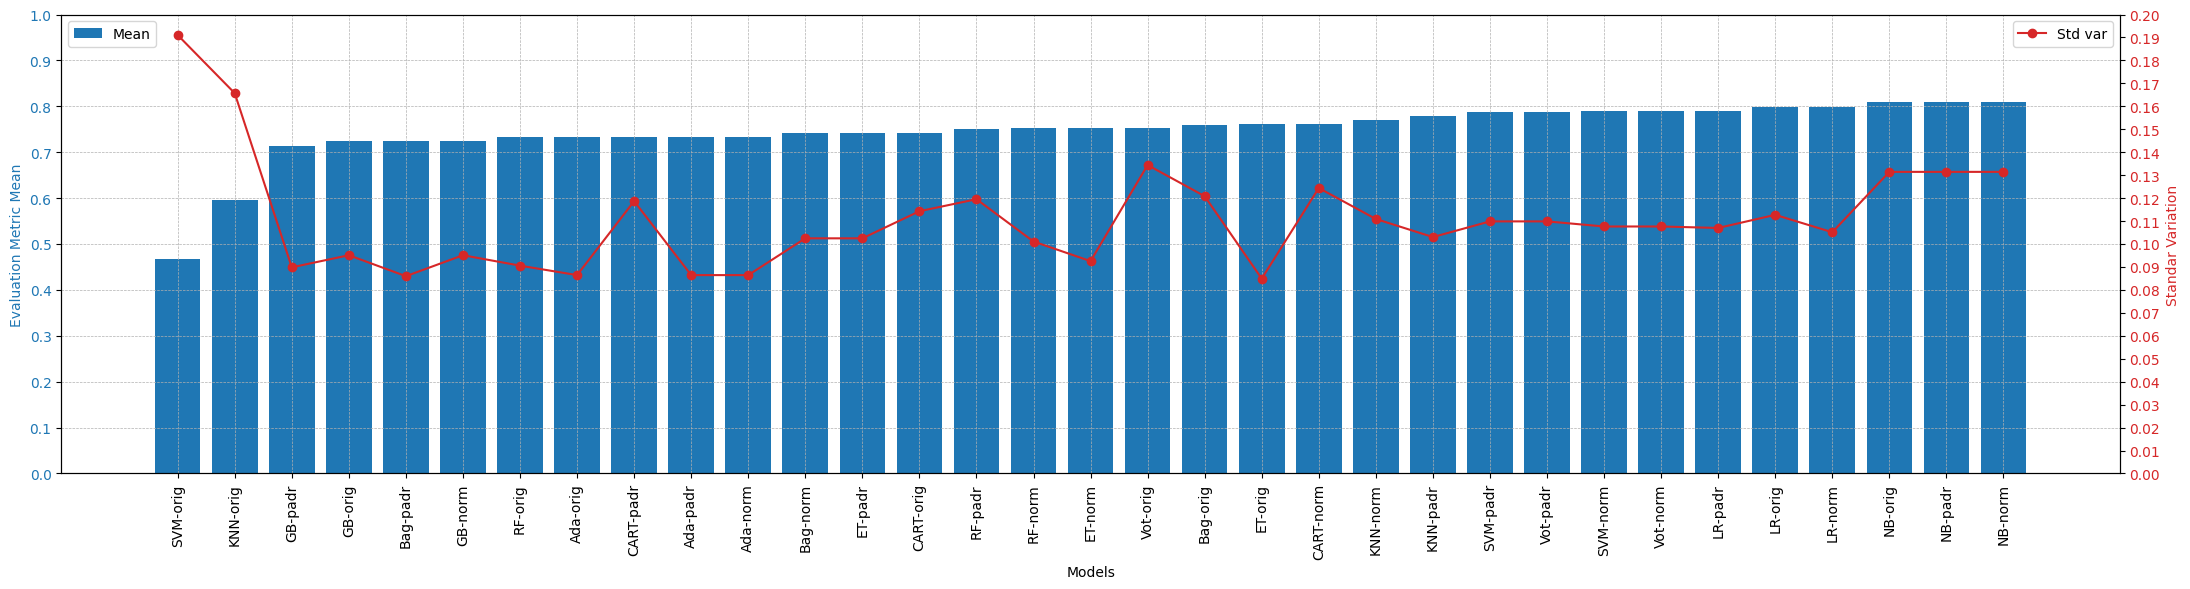

In [360]:
print(ai_names_sorted_dt[0:10])
eval_metric_mean_std_plot(ai_pip_results_10_dt, ai_pip_names_10_dt)

##5.2 Hyper Parameter Optimization

Now we will take a look on hyper parameters optimization results. To do so, we will add to our `df_all_models_results` dataframe the `grid_best_scores` list aswell as `grid_best_params` list. Then we will first sort our dataframe by `grid_best_scores` in descending order to analyze the best hyper parameter optimization performance. Finally, we will sort our dataframe by `mean` in descending order to verify if some result performance without parameter optimization was better than with it.

In [361]:
# Adding hyper parameter optimization data to dataframe
df_all_models_results['grid_best_scores'] = grid_best_scores
df_all_models_results['grid_best_params'] = grid_best_params

# Sorting by grid_best_scores in descending order
df_all_models_results[['name', 'feature_selection', 'mean', 'grid_best_scores', 'grid_best_params']].sort_values(by='grid_best_scores', ascending=False).head(5)

name feature_selection      mean  grid_best_scores  \
6   KNN-norm   select_kbest_10  0.799091          0.843636   
13  SVM-padr         rfe_lr_10  0.790000          0.834545   
0    LR-orig              none  0.808182          0.809091   
42   NB-norm          ai_dt_10  0.809091          0.809091   
41   NB-padr          ai_dt_10  0.809091          0.809091   

                                     grid_best_params  
6   {'KNN__metric': 'euclidean', 'KNN__n_neighbors...  
13  {'SVM__C': 3, 'SVM__degree': 2, 'SVM__gamma': ...  
0   {'LR__C': 1, 'LR__max_iter': 300, 'LR__penalty...  
42                                                 []  
41                                                 []

In [362]:
# Sorting by mean in descending order
df_all_models_results[['name', 'feature_selection', 'mean', 'grid_best_scores', 'grid_best_params']].sort_values(by='mean', ascending=False).head(5)

name feature_selection      mean  grid_best_scores grid_best_params
30  NB-orig          ai_rf_10  0.809091          0.809091               []
42  NB-norm          ai_dt_10  0.809091          0.809091               []
41  NB-padr          ai_dt_10  0.809091          0.809091               []
40  NB-orig          ai_dt_10  0.809091          0.809091               []
37  NB-norm          ai_gb_10  0.809091          0.809091               []

In [363]:
df_all_models_results.loc[6, 'grid_best_params']

{'KNN__metric': 'euclidean', 'KNN__n_neighbors': 5}

By looking at the dataframe sorted by `grid_best_scores` in descending order, we can observe that the algorithm K neighbors, using a normalized dataset, with the 10 best features selected by univariate feature selection with ANOVA F-value test and hyper parameters as `metric='euclidean'` and `n_neighbors=5`, had its performance increased from 0.79 to 0.84. The new K neighbors performance is better than the algorithm with any hyper parameter optimization, which is Naive Bayes with the original dataset and the 10 best features selected by attribute importance using random forest as estimator.

#6. Conclusion

So, our model candidate is the following:
* Algorithm: K neighbors
* Dataset: normalized
* Features: 10 features from univariate feature selection with ANOVA F-value test
* Hyper parameters:
  * metric: euclidean
  * n_neighbors: 5

Now we will train the candidate model using the train dataset, and then test using the test dataset.

In [364]:
# Defining random seed
np.random.seed(seed)

# Train and test dataset with the 10 best features from univariate feature selection
X_10_train = df_X_train[kbst_feature_names_sorted[:10]].values
X_10_test  = df_X_test[kbst_feature_names_sorted[:10]].values

# Normalizing traing dataset
X_10_train_scaler = StandardScaler().fit(X_10_train)
X_10_train_scaled = X_10_train_scaler.transform(X_10_train)

# Normalizing test dataset
X_10_test_scaler = StandardScaler().fit(X_10_test)
X_10_test_scaled = X_10_test_scaler.transform(X_10_test)

# Configuring model hyper parameters
model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Training the model
model.fit(X_10_train_scaled, y_train)

# Testing the model
predictions = model.predict(X_10_test_scaled)
print(recall_score(y_test, predictions))

0.8214285714285714


During the model training, the performance was 0.84 and the test result is a recall of 0.82. So our conclusion is that our model is robust and managed generalize well to present a recall performance of 0.82 during the tests.

##6.1 Future Works

There are several topics for further development of this work.

###6.1.1 Exploratory Data Analysis

Our approach in this work was to test as much as we can to find the best model to suit this problem. An exploratory data analysis could lead our decisions to a better approach, by summarizing dataset statistics; using plots like histograms, boxplots, etc; feature distribution analysis and so on. All these techniques could improve our dataset knowledge and even help us in our analysis.

### 6.1.2 Outliers Analysis

During the entire development of this work, we don't analyze the outliers and its impacts on our models. This analysis could help us to understand some behaviors and even lead some decisions.

###6.1.3 Unexpected Results Patterns

During our result analysis, we desconsidered several results because of its pattern, like same cross validation mean and standar deviation for several models. A better understand on why we got this result pattern could make us feel more confortable when considering these results to our final model candidate.

###6.1.4 Folds Test

As stated before, we didn't have enough time to test in how many folds the cross validation would perform better over our dataset. This test could lead to a better results during training.

# 7. References


Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

[What is pip, Getting Started with Python pip](https://www.knowledgehut.com/blog/programming/what-is-pip-in-python), Priyankur Sarkar at upGrad KnowledgeHut - Accessed in April 24, 2024.